# Examining Influential Factors on Poverty Status
## Clustering
---

In [145]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/Rpierre98/DSI-320-Group-Project/main/data/clean_data/cleaned_data.csv")

### Preprocessing

In [181]:
df.shape

(152732, 54)

In [182]:
df = df.replace({'POV_STS' : { 1 : 'in poverty', 0 : 'not in poverty'}})

In [43]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['AGE',
 'OUT_POCKET_NONPREM',
 'OUT_POCKET_OC',
 'WEEKS_WRK',
 'ERN_VAL',
 'EARN_TOTAL',
 'TOTAL_DIS_INC',
 'TIME_ASSIST',
 'CHLD_SUP',
 'ADJ_GROSS_INC']

In [63]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['STATE',
 'FAM_RELATIONSHIP',
 'OCCUPATION',
 'EDU_LVL',
 'MARITAL',
 'SEX',
 'HOUSEHOLD_SUMMARY',
 'MILITARY',
 'CERT_REQ',
 'TROUB_BATHE',
 'TROUB_HEAR',
 'TROUB_SEE',
 'TROUB_ALONE',
 'TROUB_WALK',
 'TROUB_CONC',
 'HISPANIC',
 'IMMIGR_YR',
 'CITIZENSHIP',
 'DISABLED',
 'RACE',
 'WORK_INDUSTRY',
 'LABOR_STATUS',
 'WRK_STATUS',
 'WRK_CLASS_LONGEST',
 'LONGEST_IND',
 'NO_WRK_RSN',
 'FT_PT',
 'EARN_SOURCE',
 'ERN_OTR',
 'WORK_DIS',
 'DIS_INC',
 'OTH_DIS_INC',
 'FIN_ASSIST',
 'OTH_INC',
 'CASH_ASSIST',
 'WIC',
 'TAX_FILE_STAT',
 'HEALTH_INS',
 'PUB_INS',
 'PRIV_INS',
 'POV_STS',
 'POV_LVL']

In [183]:
#only clustering people in poverty
df = df.loc[df["POV_STS"] == 'in poverty']

In [186]:
#select features for clustering
X = df[['FAM_RELATIONSHIP', 'OCCUPATION', 'EDU_LVL', 'MARITAL', 'SEX','MILITARY', 'HISPANIC', 'IMMIGR_YR',
        'CITIZENSHIP', 'DISABLED','RACE', 'WORK_INDUSTRY', 'LABOR_STATUS', 'WRK_STATUS', 'NO_WRK_RSN',
        'FT_PT', 'EARN_SOURCE', 'ERN_OTR', 'WORK_DIS', 'TAX_FILE_STAT','HEALTH_INS', 'PUB_INS', 'PRIV_INS',
         'WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM', 'OUT_POCKET_OC', 'POV_STS']]

In [187]:
#scale appropriate numeric features
ctx = ColumnTransformer([
    ('ss', StandardScaler(), ['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC',
                              'OUT_POCKET_NONPREM', 'OUT_POCKET_OC'])],
    verbose_feature_names_out = False, remainder='passthrough')

In [188]:
#transform data and place in dataframe
X_transformed = ctx.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed,columns = ctx.get_feature_names_out())

In [189]:
X_num = X_transformed[['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM', 'OUT_POCKET_OC']]
X_cat = X_transformed.drop(columns = ['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM',
                                      'OUT_POCKET_OC'])

## Numerical Clustering
---

### KMeans

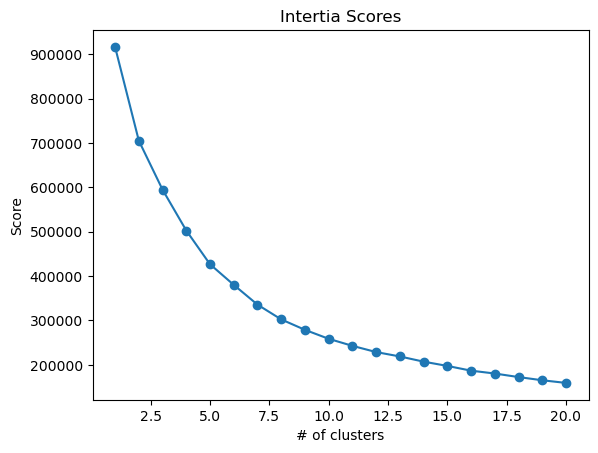

In [49]:
inertia_list = []

for k in range(1,21):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X_num)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1,21), inertia_list, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.title("Intertia Scores");

In [52]:
inertia_list

[916391.9999999937,
 705195.7940329512,
 594740.4304634774,
 502633.42756959656,
 426629.9585633119,
 380188.4712370871,
 335620.4694273917,
 302331.88112632255,
 278808.0066165724,
 258583.0359460342,
 242707.89285919728,
 228697.21110767024,
 218795.50769705337,
 207090.85777714624,
 197473.73987736827,
 186782.84876957416,
 180336.37770839606,
 172359.19857420766,
 165149.2600646079,
 159156.95556389345]

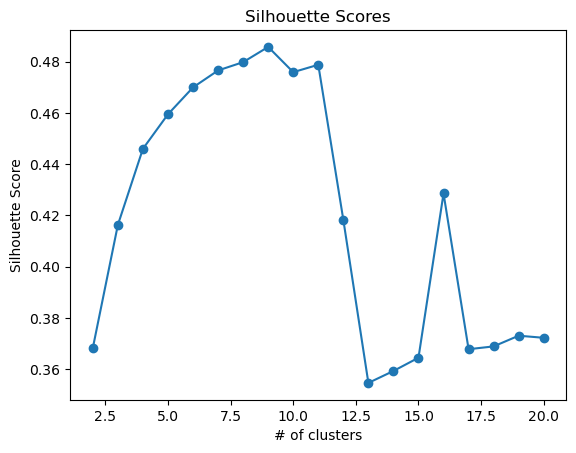

In [55]:
silhouette_list = []

for k in range(2,21):
    kmeans = KMeans(n_clusters=k,random_state = 42)
    kmeans.fit(X_num)
    silhouette_list.append(silhouette_score(X_num, kmeans.labels_))
    
plt.plot(range(2, 21), silhouette_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores');

In [56]:
silhouette_list

[0.3683077151222541,
 0.41632690432044217,
 0.44600728057030614,
 0.4594721929085186,
 0.4699539828538694,
 0.47656410426476203,
 0.47979672055974015,
 0.48573654878896033,
 0.47589150674642705,
 0.4787800801040417,
 0.4183071995463479,
 0.35469204620394923,
 0.3593471339329629,
 0.36451706855151916,
 0.42858322451652364,
 0.3678394310829727,
 0.36893601790503217,
 0.37310878110704804,
 0.3722898830166193]

In [20]:
kmeans = KMeans(n_clusters=8,random_state = 42)
kmeans.fit(X_num)
X_km = X[X_num.columns].copy()
X_km['cluster'] = kmeans.labels_

### KMeans Analysis

In [64]:
X_km['cluster'].value_counts(normalize=True)

0    0.370472
1    0.332687
4    0.206866
2    0.059392
7    0.016002
3    0.011681
5    0.002756
6    0.000144
Name: cluster, dtype: float64

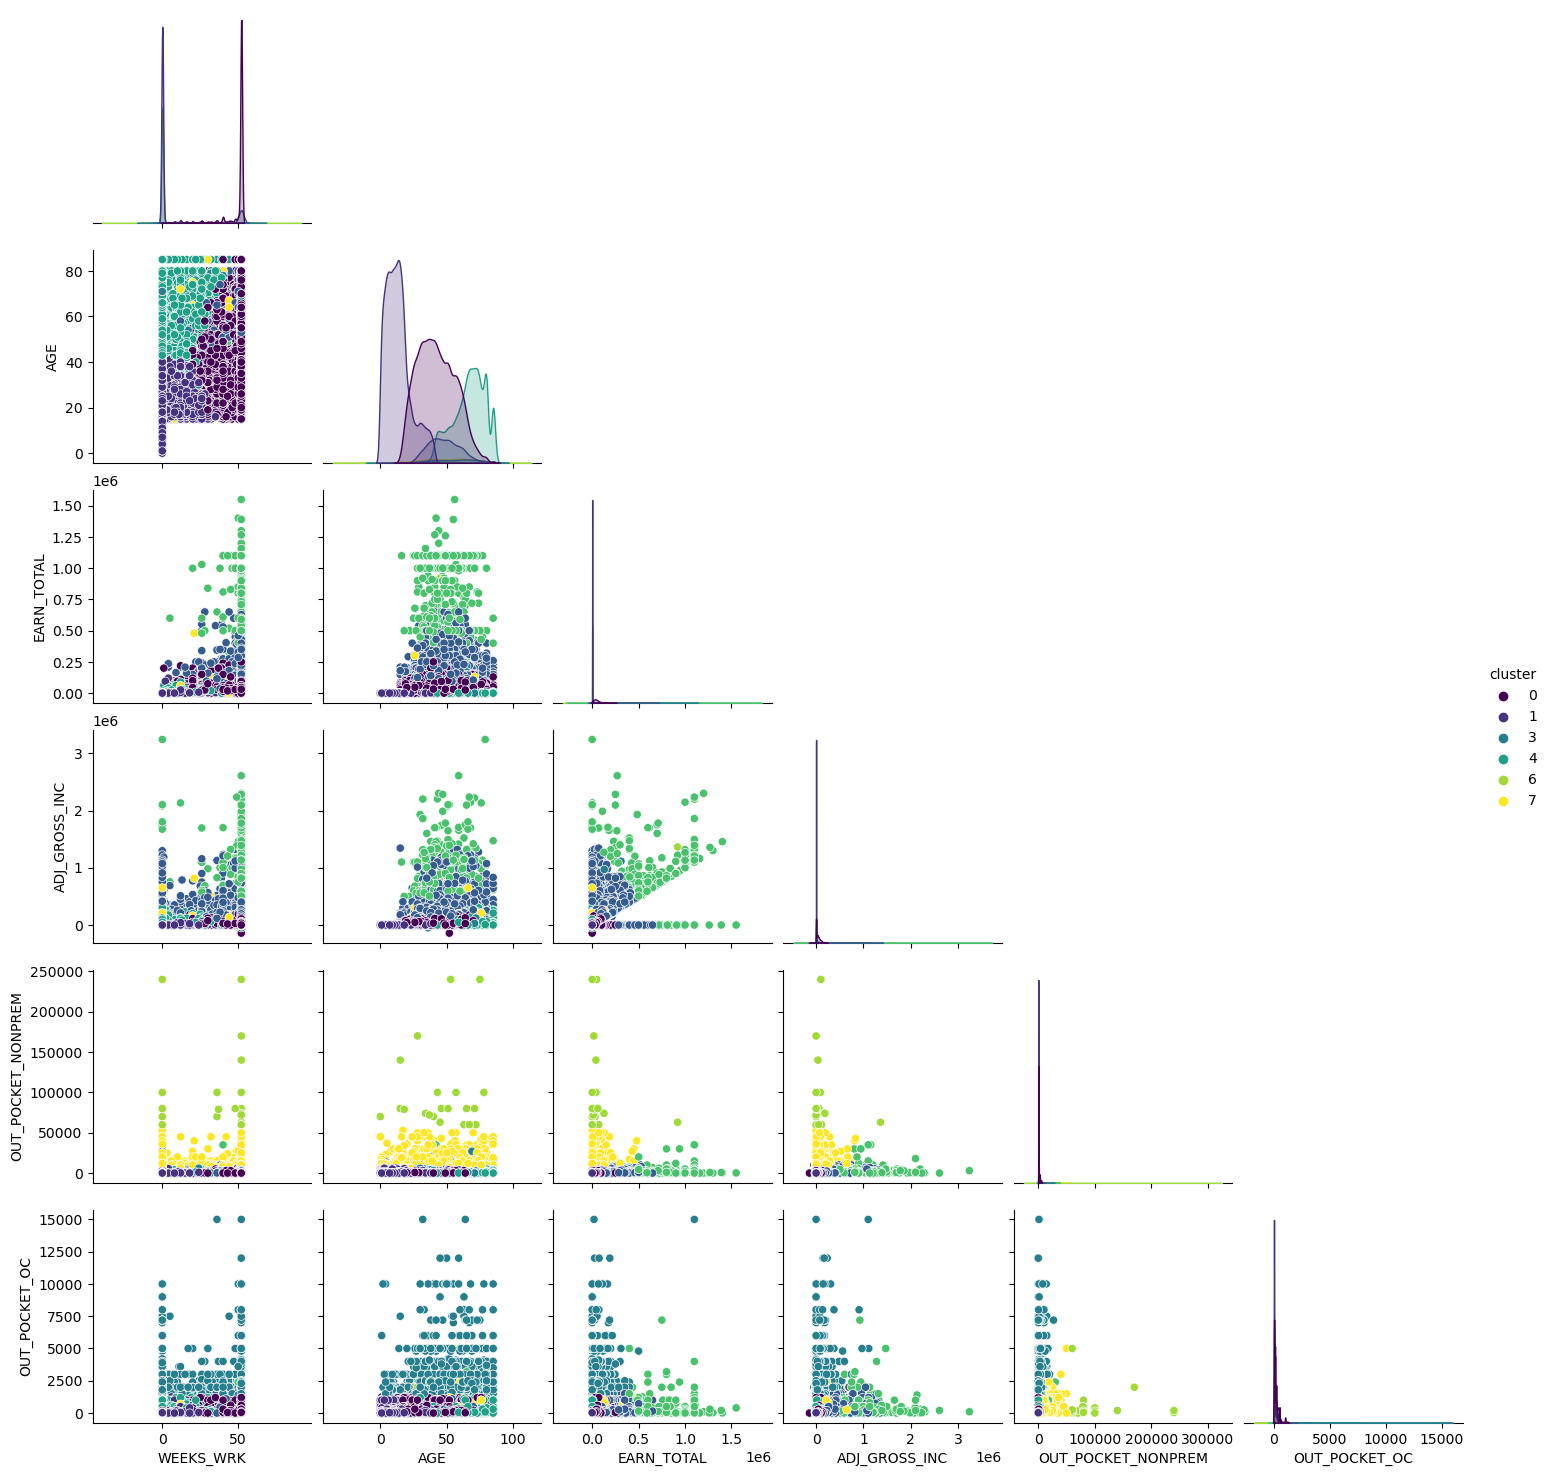

In [70]:
sns.pairplot(data = X_km, hue = 'cluster', corner = True, palette = 'viridis');

In [39]:
X_km.groupby("cluster").agg(['mean', 'median'])

WEEKS_WRK               AGE            EARN_TOTAL            \
              mean median       mean median           mean    median   
cluster                                                                
0        50.239241   52.0  42.189668   41.0   46846.314476   40000.0   
1         1.442789    0.0  13.318783   12.0     655.228607       0.0   
2        49.347150   52.0  48.060633   47.0  138876.521111  120300.0   
3        29.148543   48.0  54.049327   56.0   40071.818946   18000.0   
4         1.302295    0.0  66.636525   68.0     950.215161       0.0   
5        49.750594   52.0  49.520190   49.0  757888.800475  760000.0   
6        30.772727   42.5  47.318182   48.5   65072.818182   13800.0   
7        30.046645   48.0  50.182897   52.0   37385.729951   20650.0   

         ADJ_GROSS_INC           OUT_POCKET_NONPREM          OUT_POCKET_OC  \
                  mean    median               mean   median          mean   
cluster                                                                      
0         39247.512610   30000.0         553.715621    200.0    144.134051   
1          1906.847516       0.0         248.627509      0.0     72.133787   
2        239261.013560  204002.0        1039.230074    500.0    218.707199   
3         61735.850897   30000.0        2412.985426   1500.0   2465.117713   
4         19952.059408       0.0         595.204811    200.0    174.919671   
5        800433.090261  797311.0        1791.237530    600.0    325.057007   
6         99345.227273   15502.0       98090.909091  80000.0    496.363636   
7         60500.651800   35023.5       10204.594926   8000.0    361.224632   

                 
         median  
cluster          
0         100.0  
1          25.0  
2         100.0  
3        2000.0  
4         100.0  
5         100.0  
6         152.5  
7         200.0

In [40]:
X_km.groupby("cluster").agg(['min', 'max'])

WEEKS_WRK     AGE     EARN_TOTAL          ADJ_GROSS_INC           \
              min max min max        min      max           min      max   
cluster                                                                    
0               1  52  15  85          0   250002       -141217   231282   
1               0  36   0  41          0   120000         -9999   239869   
2               0  52  15  85          0   680000             0  1343737   
3               0  52   1  85          0  1099999        -47777  1114470   
4               0  44  30  85          0   100000         -9999   320237   
5               0  52  16  85          0  1550000             0  3240777   
6               0  52   0  78          0   920000             0  1363000   
7               0  52   0  85          0   480000         -9999   833660   

        OUT_POCKET_NONPREM         OUT_POCKET_OC         
                       min     max           min    max  
cluster                                                  
0                        0    5700             0   1300  
1                        0    7000             0   1300  
2                        0   12000             0   2000  
3                        0   27000          1250  15000  
4                        0    6000             0   1400  
5                        0   35000             0   7200  
6                    60000  240000             0   5000  
7                     4500   53000             0   5000

* Cluster 1 appears to contain many children and young people.
* Cluster 4 appears to contain the oldest individuals. 
* Understandably, neither of the aforementioned work (and earn much by extension) in compoarison to other clusters.
* Cluster.5 and Cluster 2 contain individuals that earn the most on average.
* Cluster 6 (.01% of data) overwhelmingly has individuals that pay the most out of pocket for non-premium medical care whereas Cluster 3 has people that pay the most for out of pocket over the counter purchases. 

In [40]:
df['cluster'] = kmeans.labels_

In [110]:
df.groupby('cluster')['POV_STS'].value_counts(normalize=True)

cluster  POV_STS       
0        not in poverty    0.970397
         in poverty        0.029603
1        not in poverty    0.918582
         in poverty        0.081418
2        not in poverty    0.995811
         in poverty        0.004189
3        not in poverty    0.910874
         in poverty        0.089126
4        not in poverty    0.846463
         in poverty        0.153537
5        not in poverty    1.000000
6        in poverty        0.727273
         not in poverty    0.272727
7        not in poverty    0.888707
         in poverty        0.111293
Name: POV_STS, dtype: float64

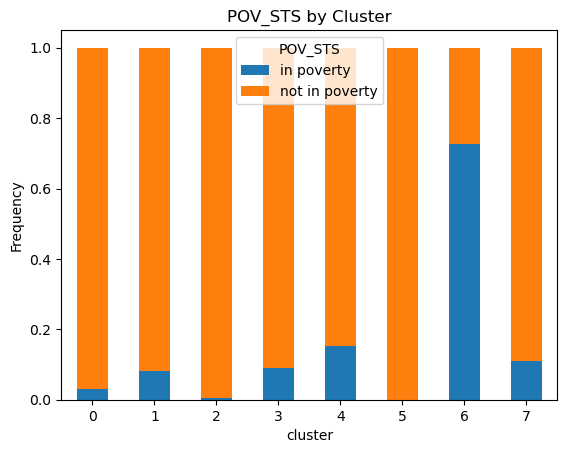

In [79]:
cluster_group = df.groupby('cluster')['POV_STS'].value_counts(normalize=True)
cluster_group.unstack().plot.bar(stacked=True)
plt.ylabel("Frequency")
plt.xticks(rotation=360)
plt.title("POV_STS by Cluster");

In addition to the aforementioned, Cluster 6 has the 3rd lowest median adjusted gross income and total wage and salary earnings. The high age on average may contribute to the second highest POV_STS frequency found in Cluster 4.

### Cluster 6 Analysis

In [59]:
df6 = df.loc[df['cluster'] == 6]

In [114]:
def f_plot(variable, color = 'blue'):
    df_1 = df6.loc[df6['POV_STS'] == 'in poverty']
    fig, ax =  plt.subplots(1, 1, figsize=(12,8))
    
    sns.barplot(x=df_1[variable].value_counts().index, y = df_1[variable].value_counts\
                  (normalize = True),color = 'orange', alpha = 0.75,
              order=df_1[variable].value_counts(ascending=True).index)
    ax.tick_params(rotation=90)
    ax.set_title(f"{variable} - In Poverty", fontweight = 'bold')
    ax.set_xlabel("Category")
    ax.set_ylabel("Frequency")
    plt.tight_layout()
    plt.subplots_adjust(wspace=.4)

In [128]:
categorical_columns

['STATE',
 'FAM_RELATIONSHIP',
 'OCCUPATION',
 'EDU_LVL',
 'MARITAL',
 'SEX',
 'HOUSEHOLD_SUMMARY',
 'MILITARY',
 'CERT_REQ',
 'TROUB_BATHE',
 'TROUB_HEAR',
 'TROUB_SEE',
 'TROUB_ALONE',
 'TROUB_WALK',
 'TROUB_CONC',
 'HISPANIC',
 'IMMIGR_YR',
 'CITIZENSHIP',
 'DISABLED',
 'RACE',
 'WORK_INDUSTRY',
 'LABOR_STATUS',
 'WRK_STATUS',
 'WRK_CLASS_LONGEST',
 'LONGEST_IND',
 'NO_WRK_RSN',
 'FT_PT',
 'EARN_SOURCE',
 'ERN_OTR',
 'WORK_DIS',
 'DIS_INC',
 'OTH_DIS_INC',
 'FIN_ASSIST',
 'OTH_INC',
 'CASH_ASSIST',
 'WIC',
 'TAX_FILE_STAT',
 'HEALTH_INS',
 'PUB_INS',
 'PRIV_INS',
 'POV_STS',
 'POV_LVL']

In [131]:
plot_list = ["OCCUPATION", 'EDU_LVL', 'MARITAL', 'DISABLED', 'SEX', 'CITIZENSHIP', 
            'RACE', 'LABOR_STATUS', 'HEALTH_INS', 'PUB_INS', 'PRIV_INS','FAM_RELATIONSHIP',
            'WORK_INDUSTRY', 'NO_WRK_RSN', 'DIS_INC', 'TAX_FILE_STAT']

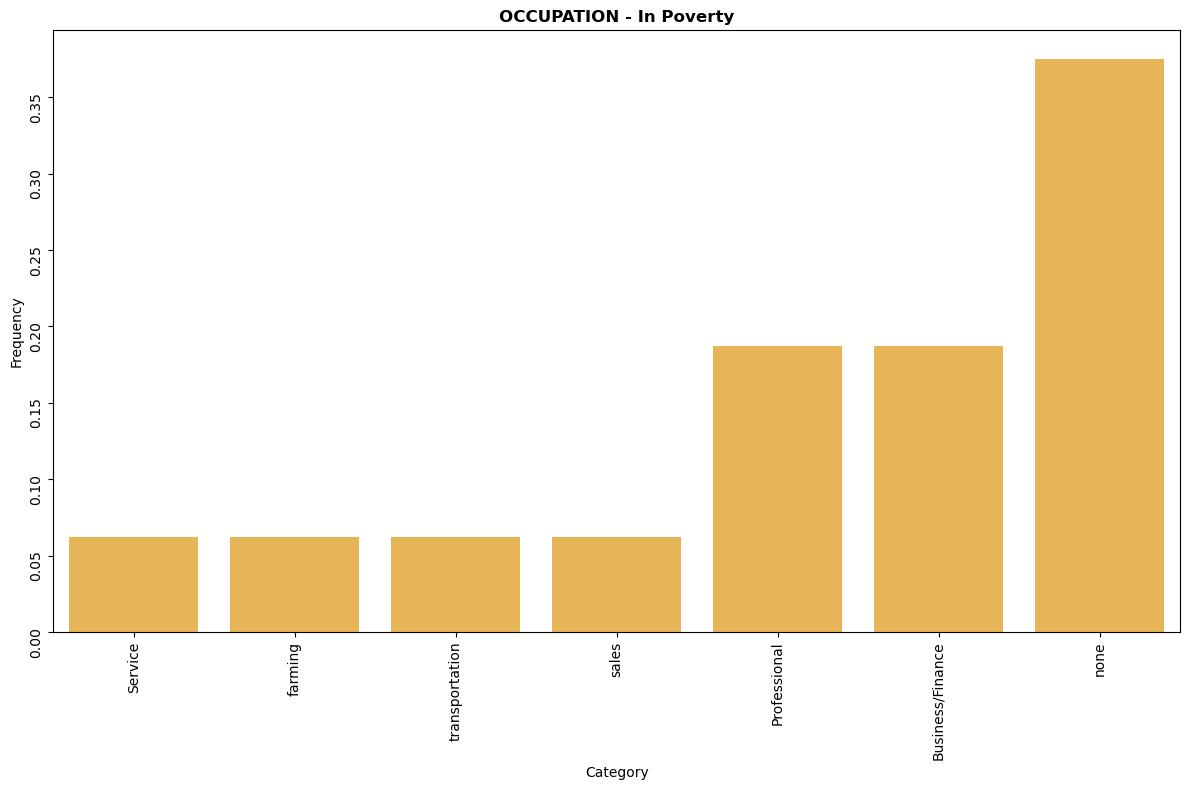

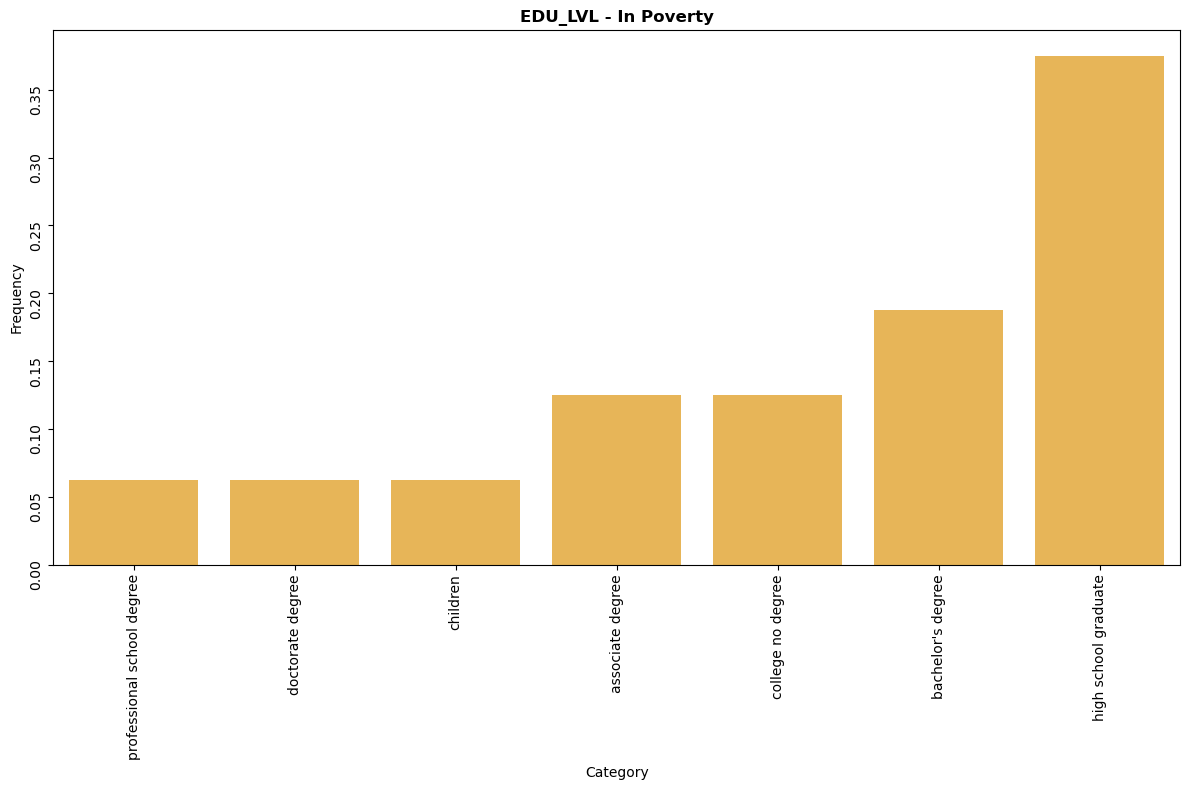

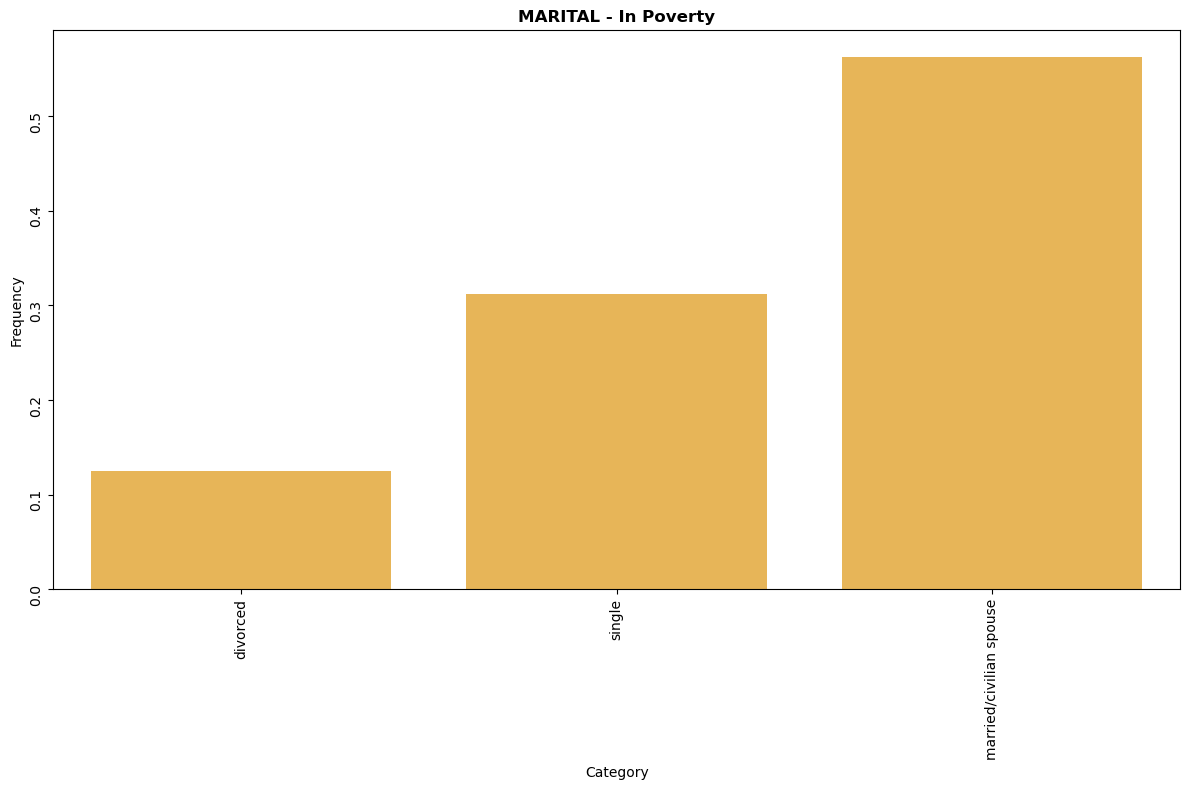

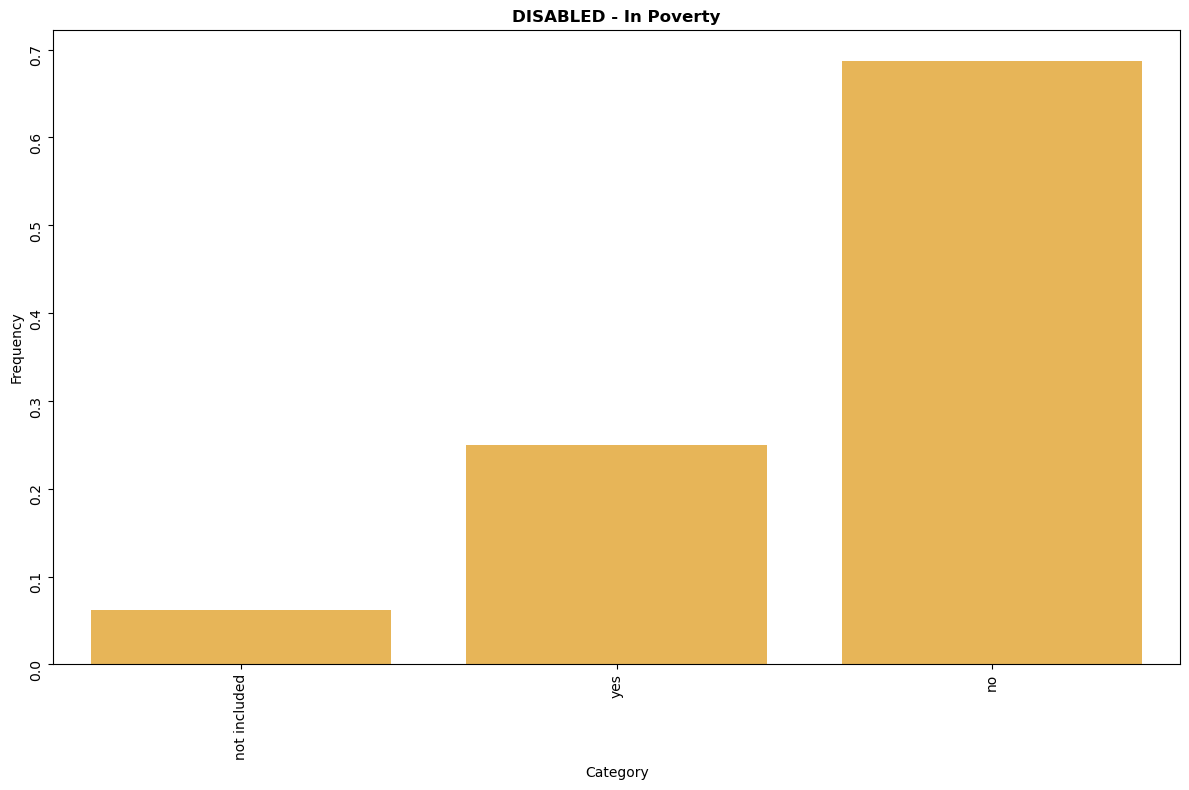

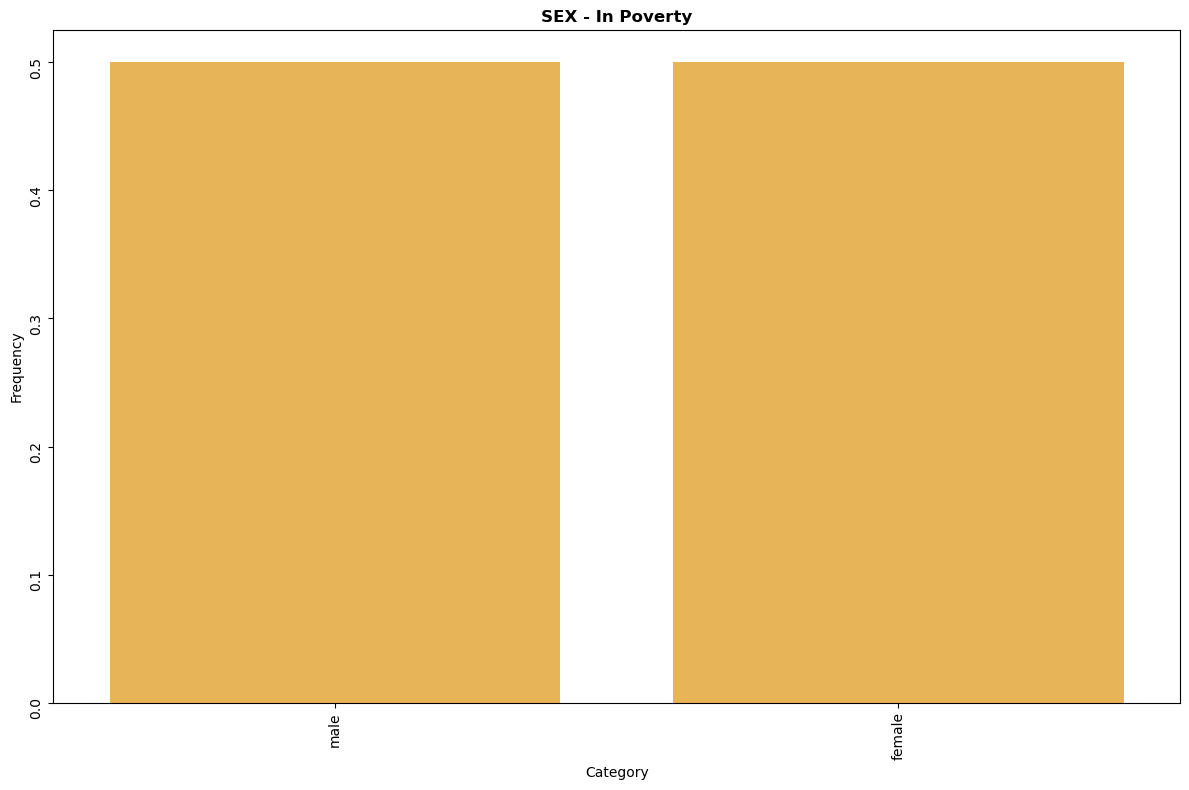

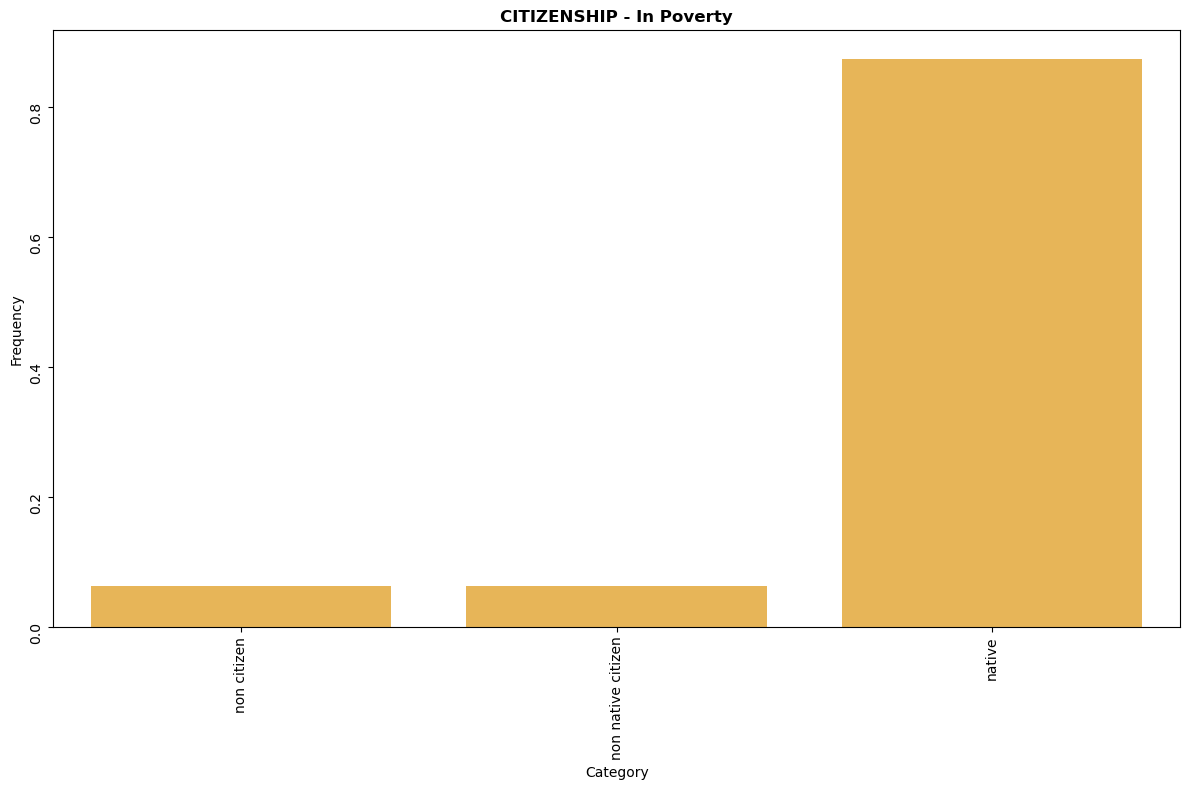

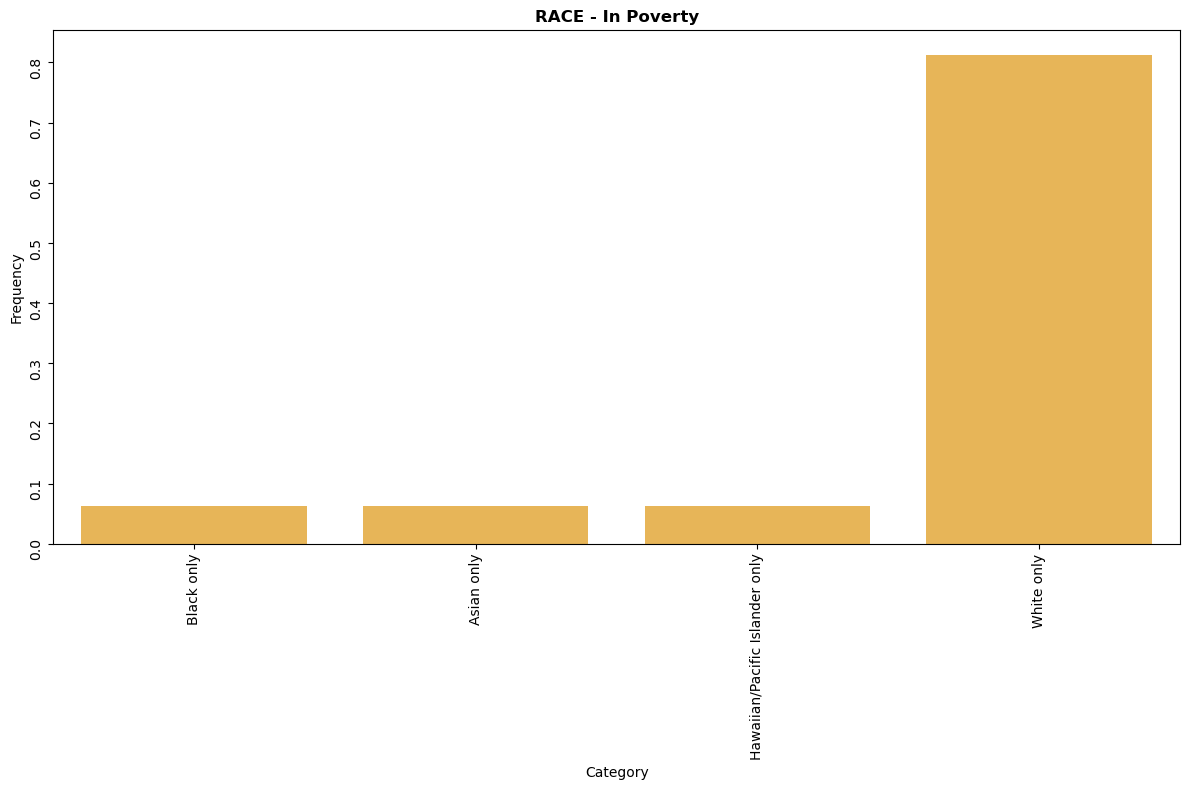

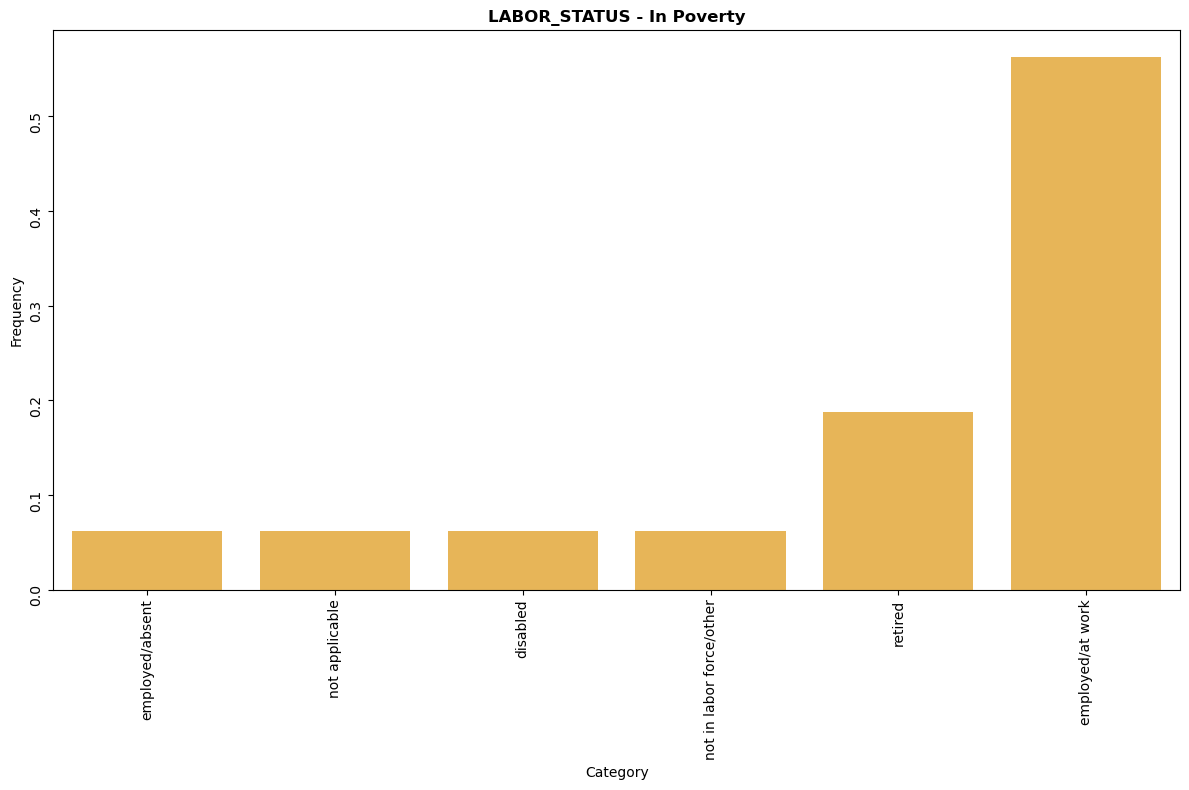

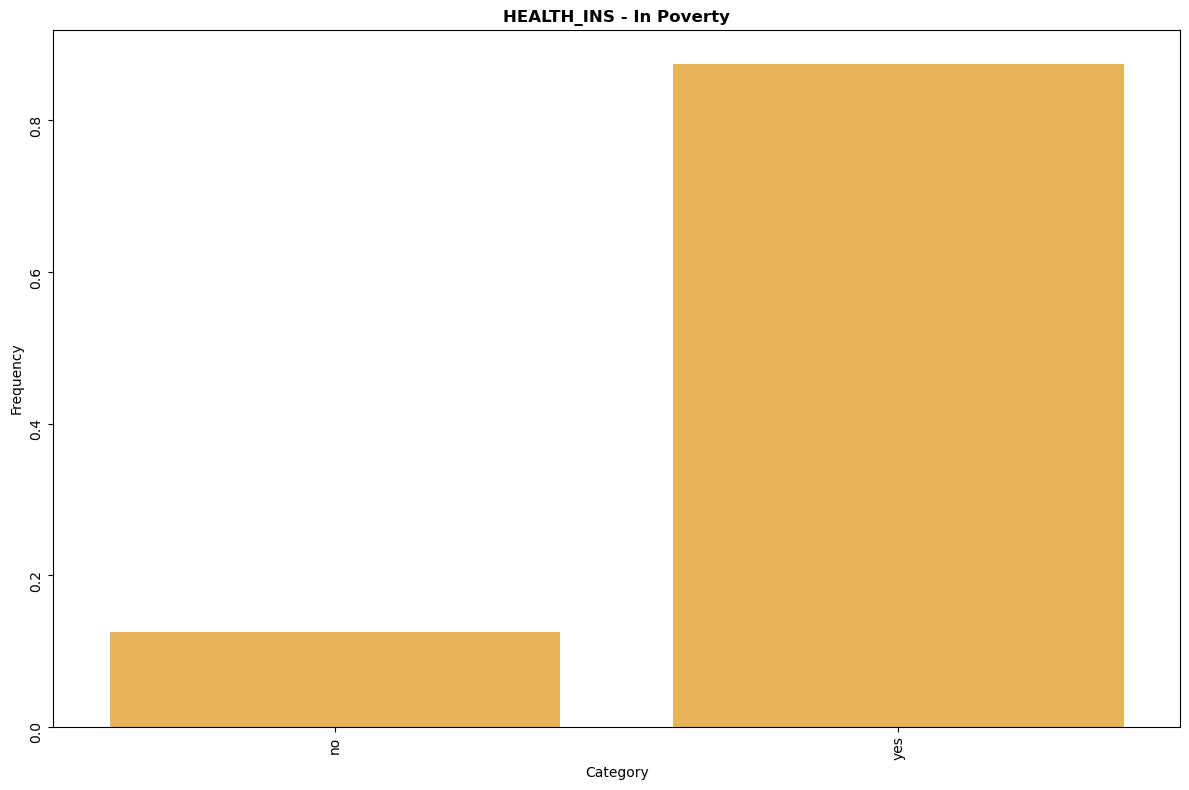

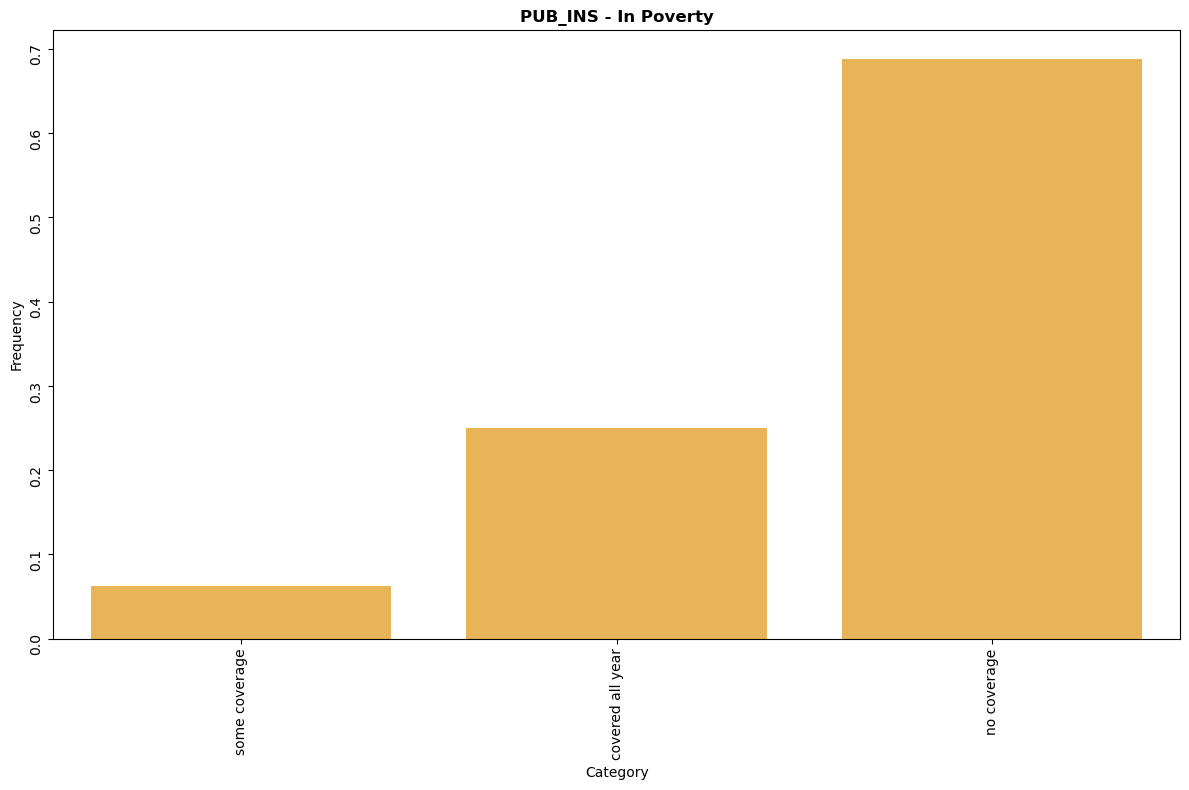

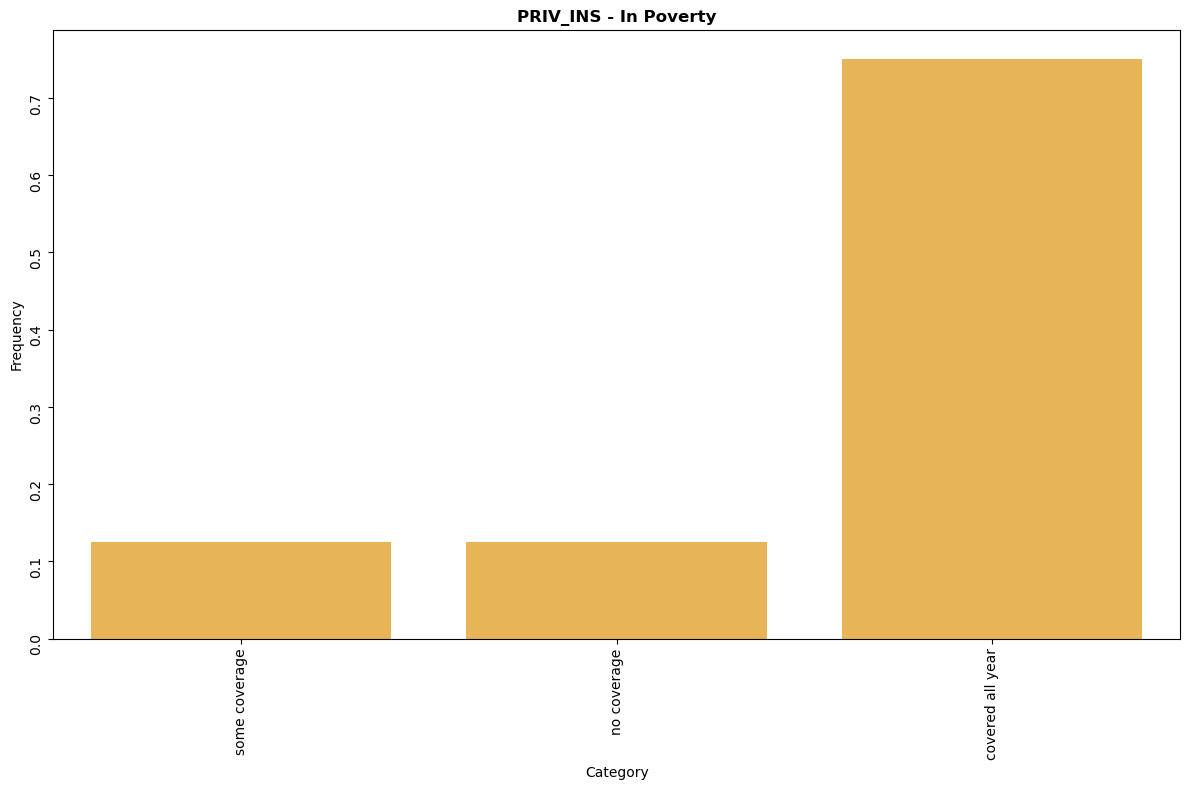

In [108]:
for col in plot_list:
    f_plot(col)

Considering individuals in Cluster 6 that are classified in poverty:
* represents roughly 16 people
* children and more highly educated are less likely to be in poverty
* majority are married, white, native citizens, and employed with private insurance coverage

### Cluster 4 Analysis

In [111]:
df4 = df.loc[df['cluster'] == 4]

In [122]:
def f_plot2(variable, color = 'blue'):
    df_1 = df4.loc[df4['POV_STS'] == 'in poverty']
    fig, ax =  plt.subplots(1, 1, figsize=(12,8))
    
    sns.barplot(x=df_1[variable].value_counts().index, y = df_1[variable].value_counts\
                  (normalize = True),color = 'orange', alpha = 0.75,
              order=df_1[variable].value_counts(ascending=True).index)
    ax.tick_params(rotation=90)
    ax.set_title(f"{variable} - In Poverty", fontweight = 'bold')
    ax.set_xlabel("Category")
    ax.set_ylabel("Frequency")
    plt.tight_layout()
    plt.subplots_adjust(wspace=.4)

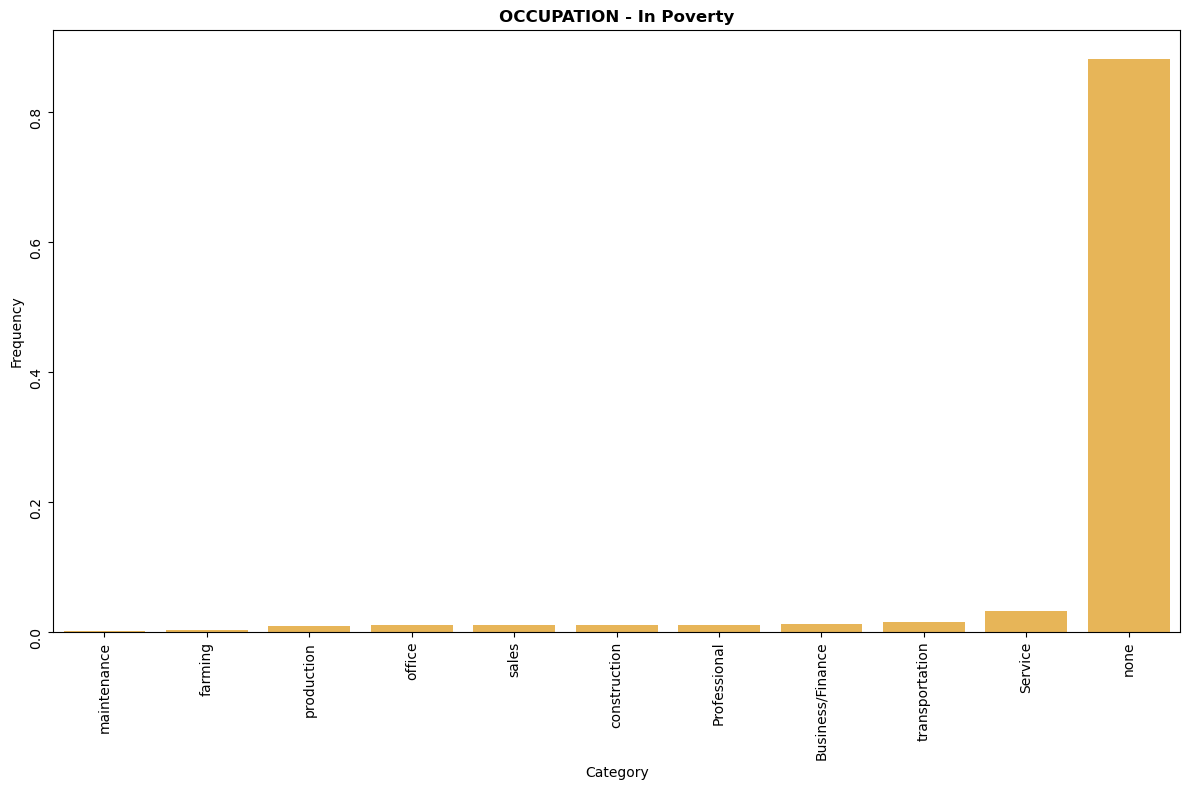

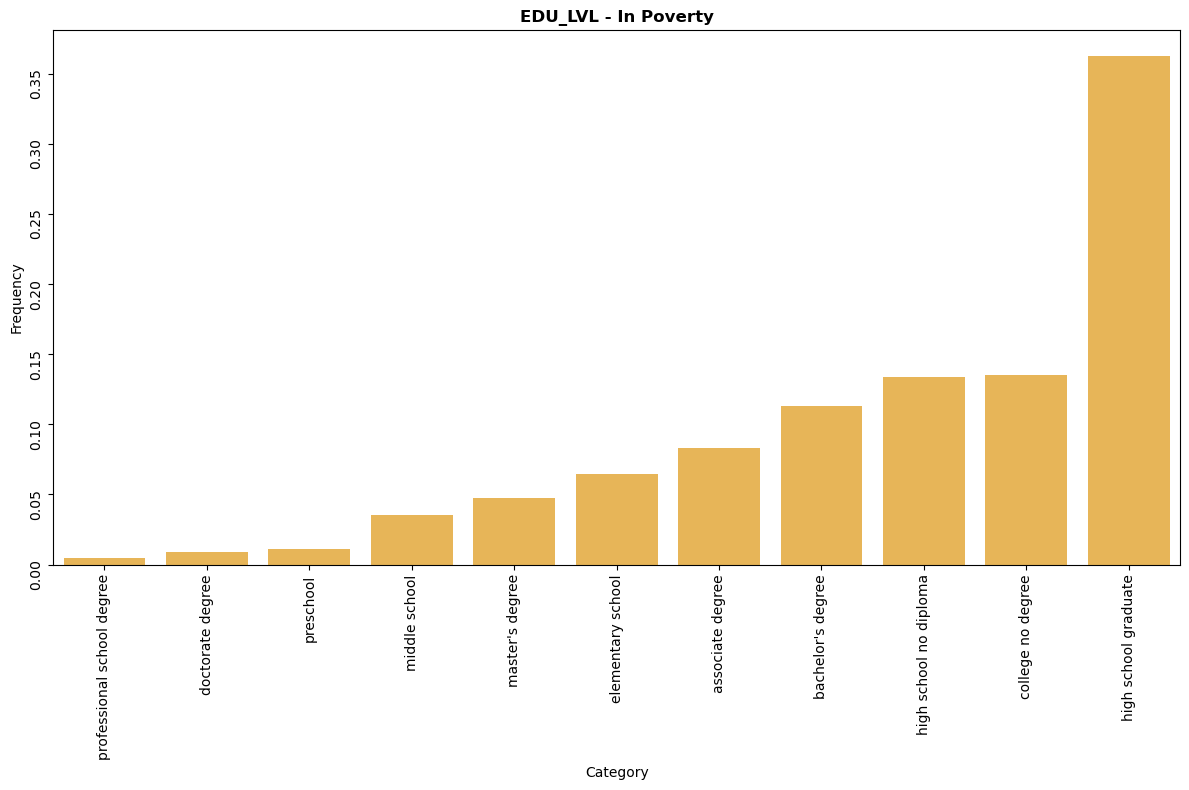

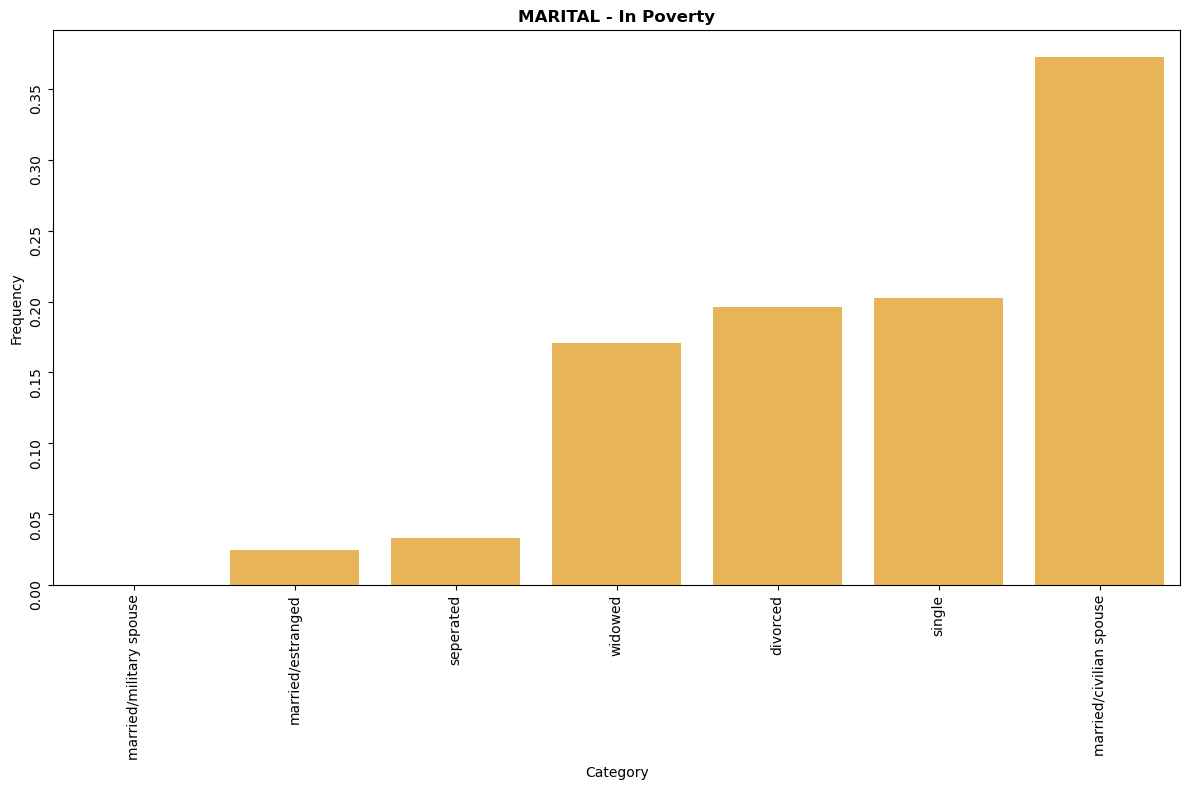

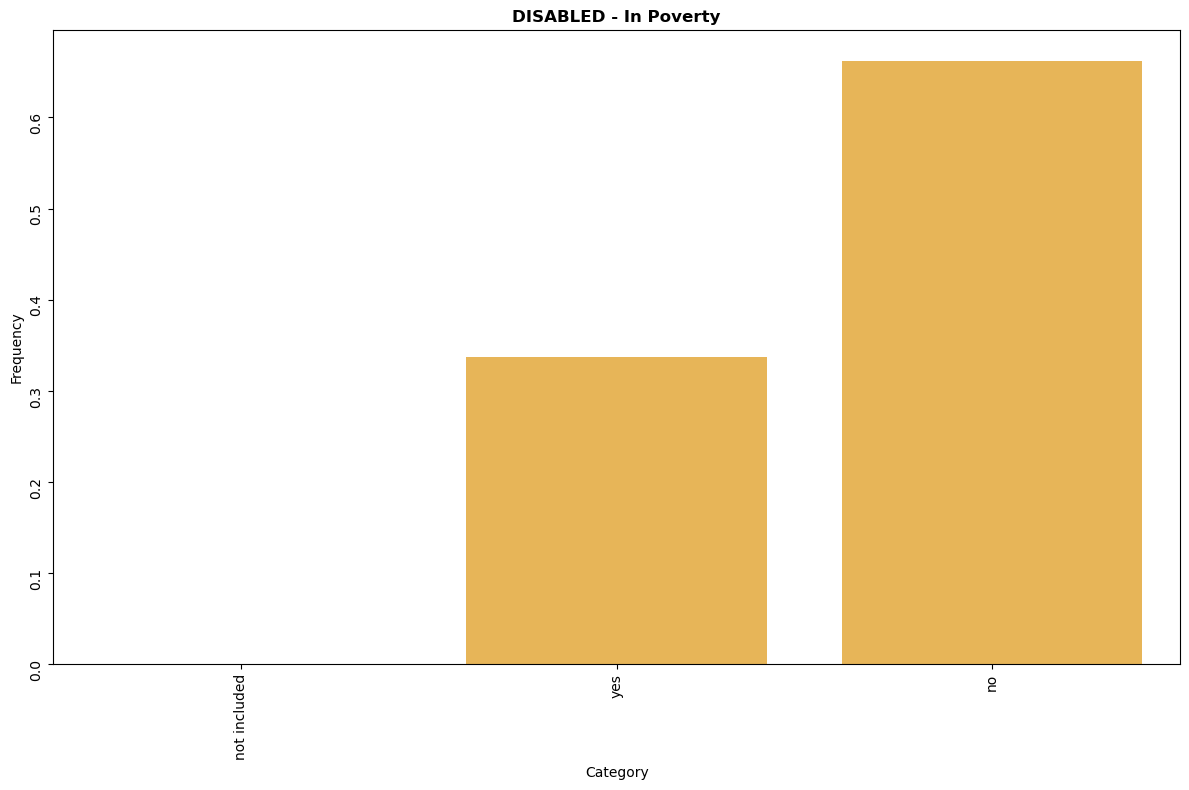

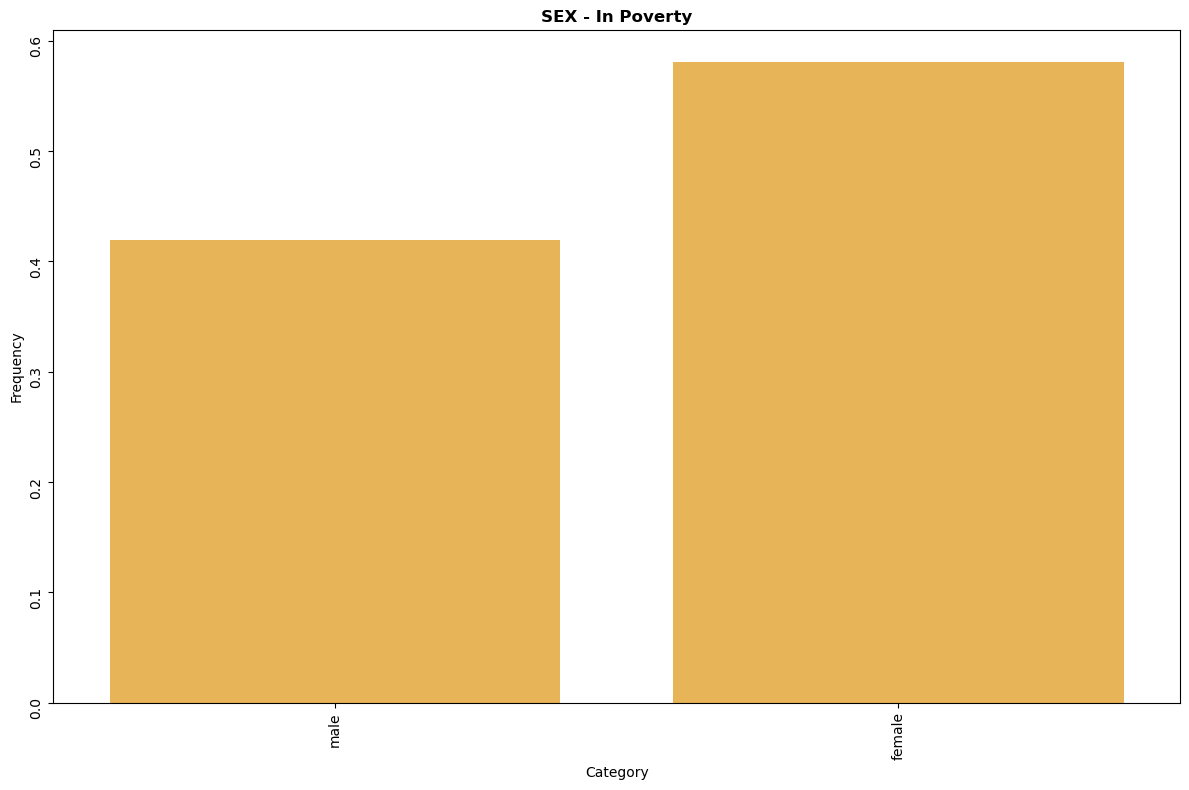

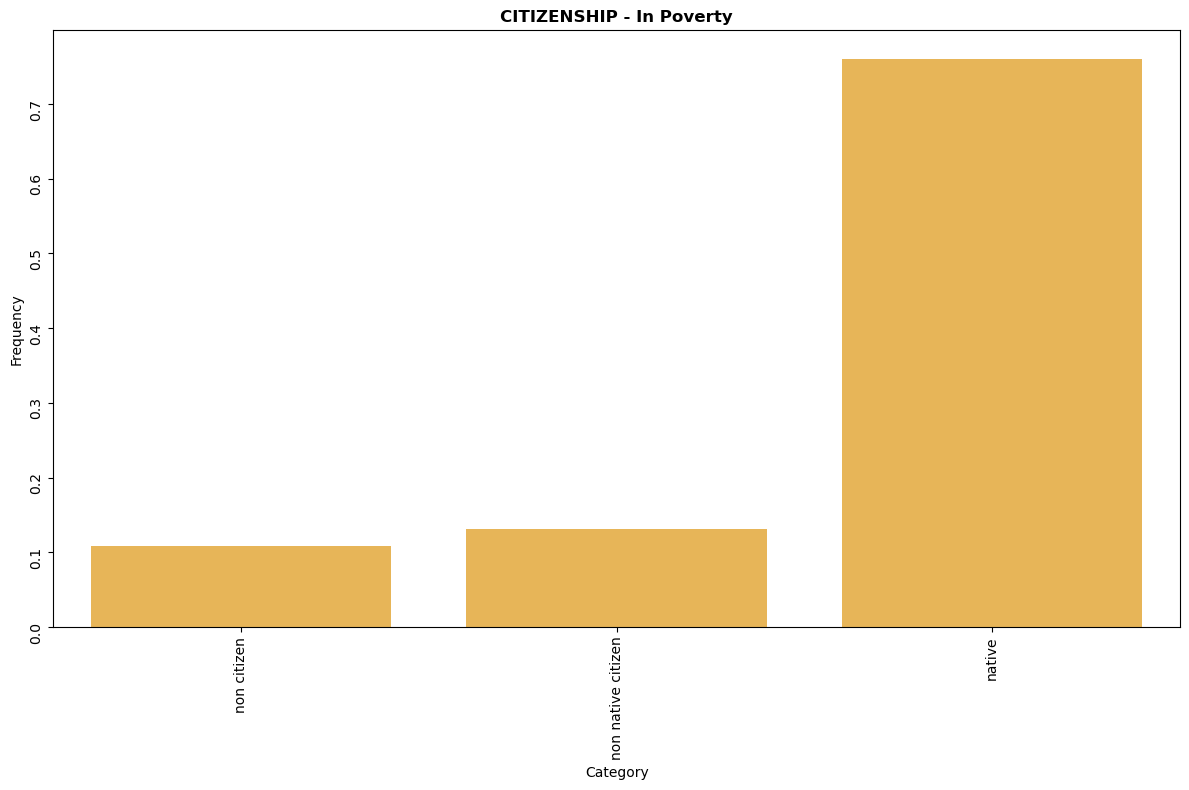

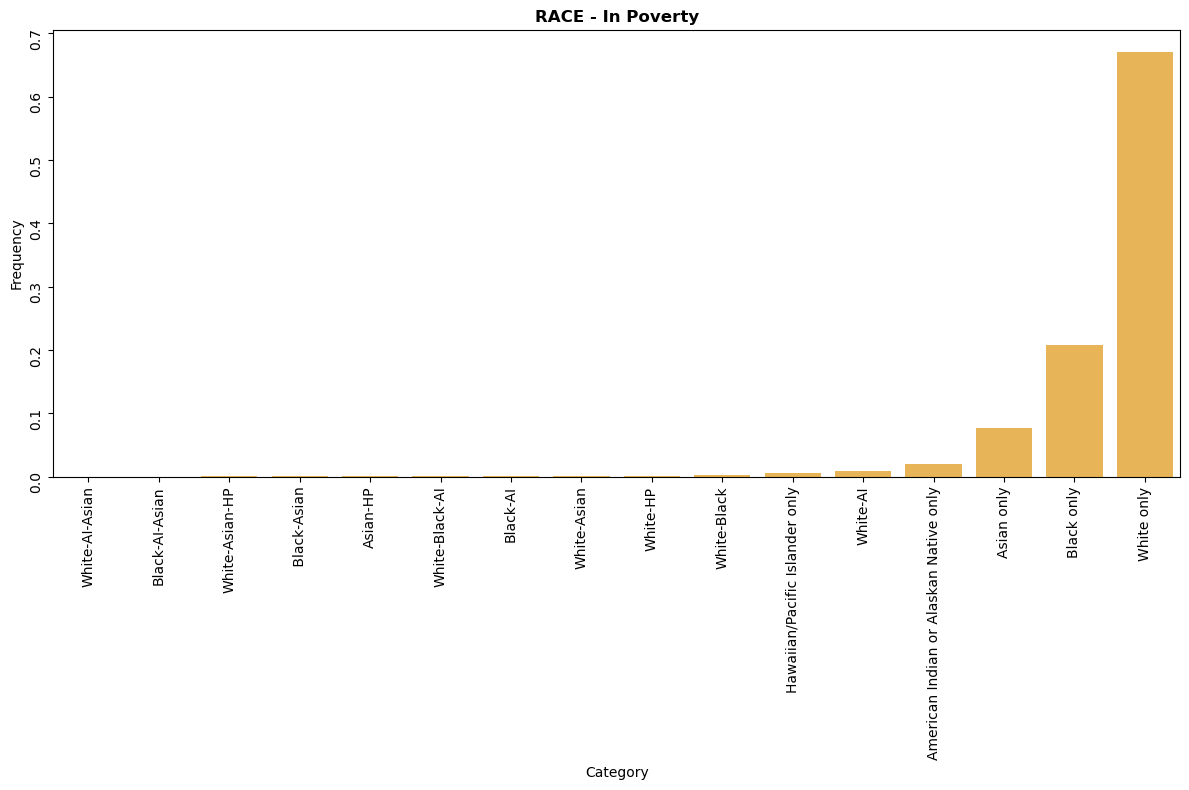

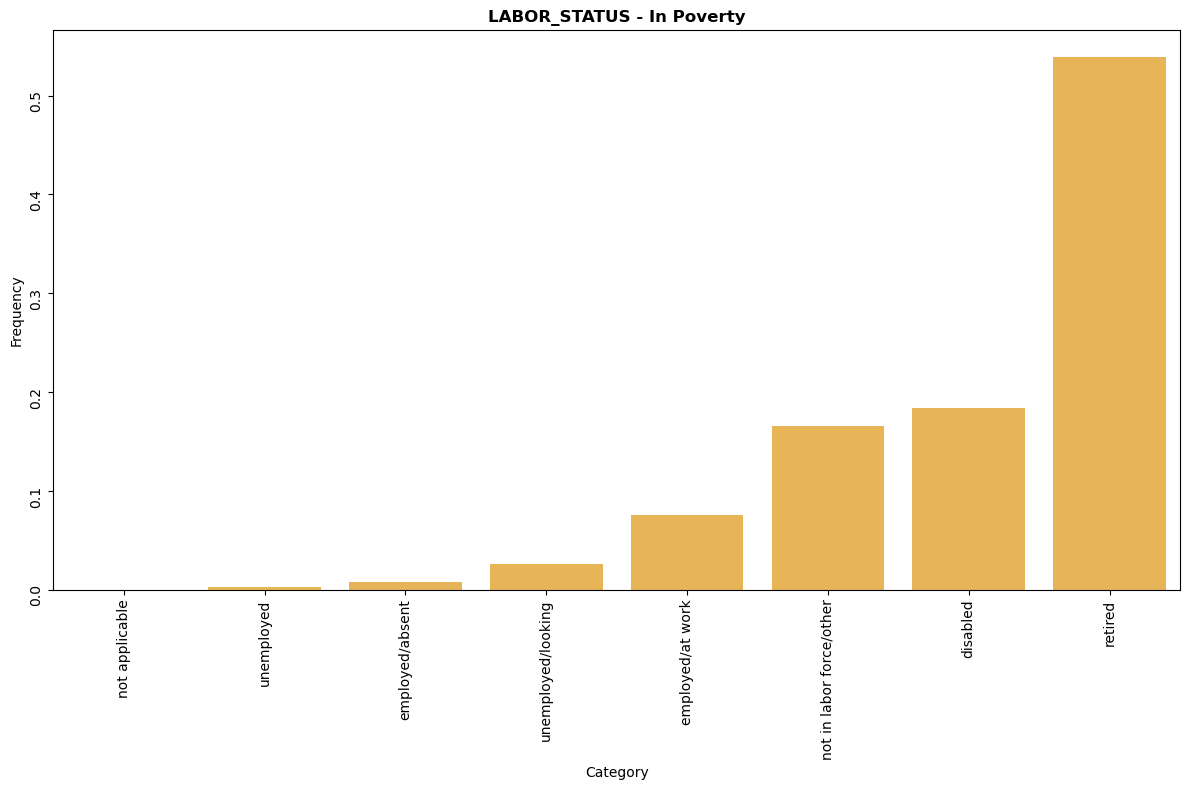

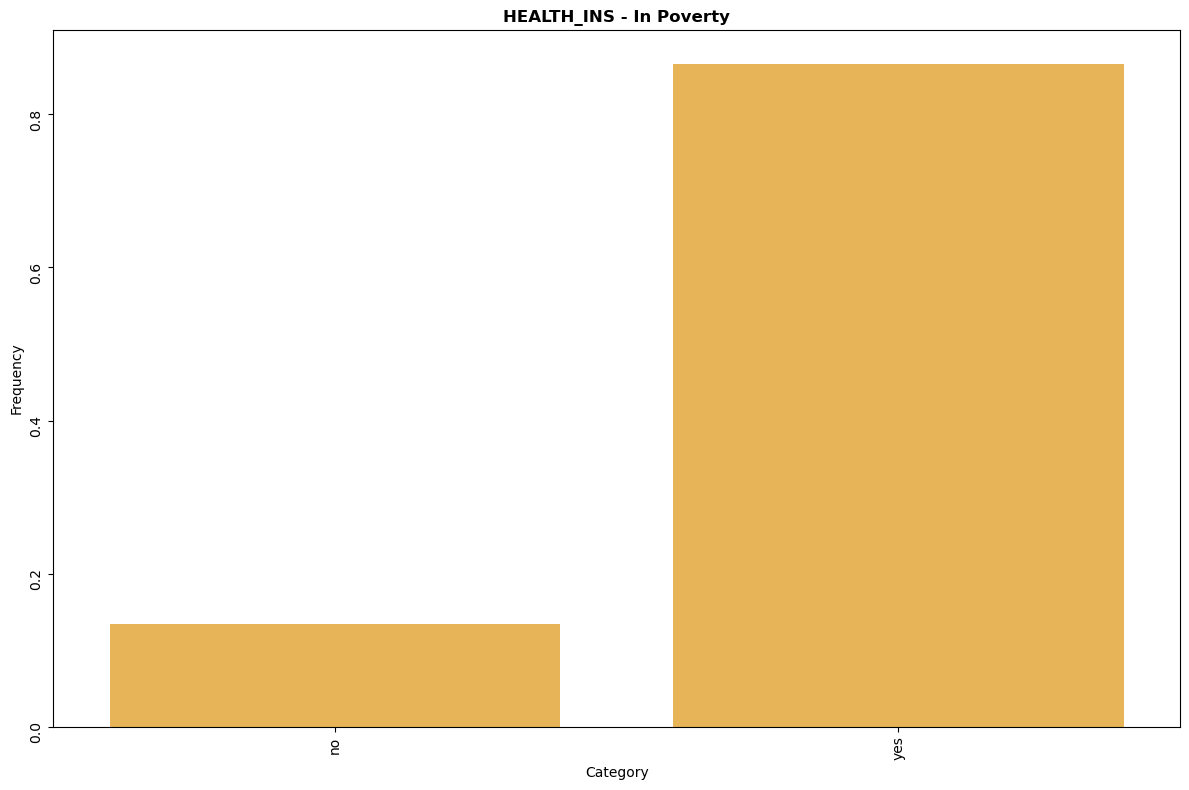

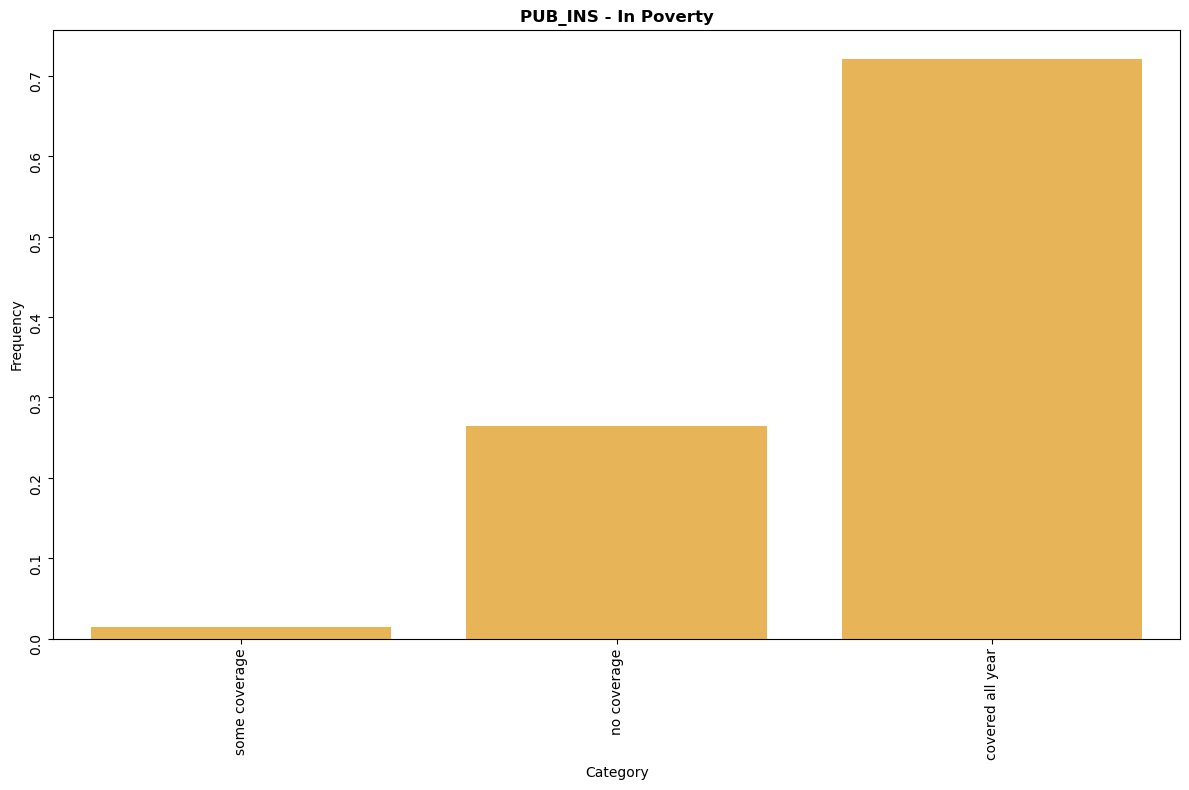

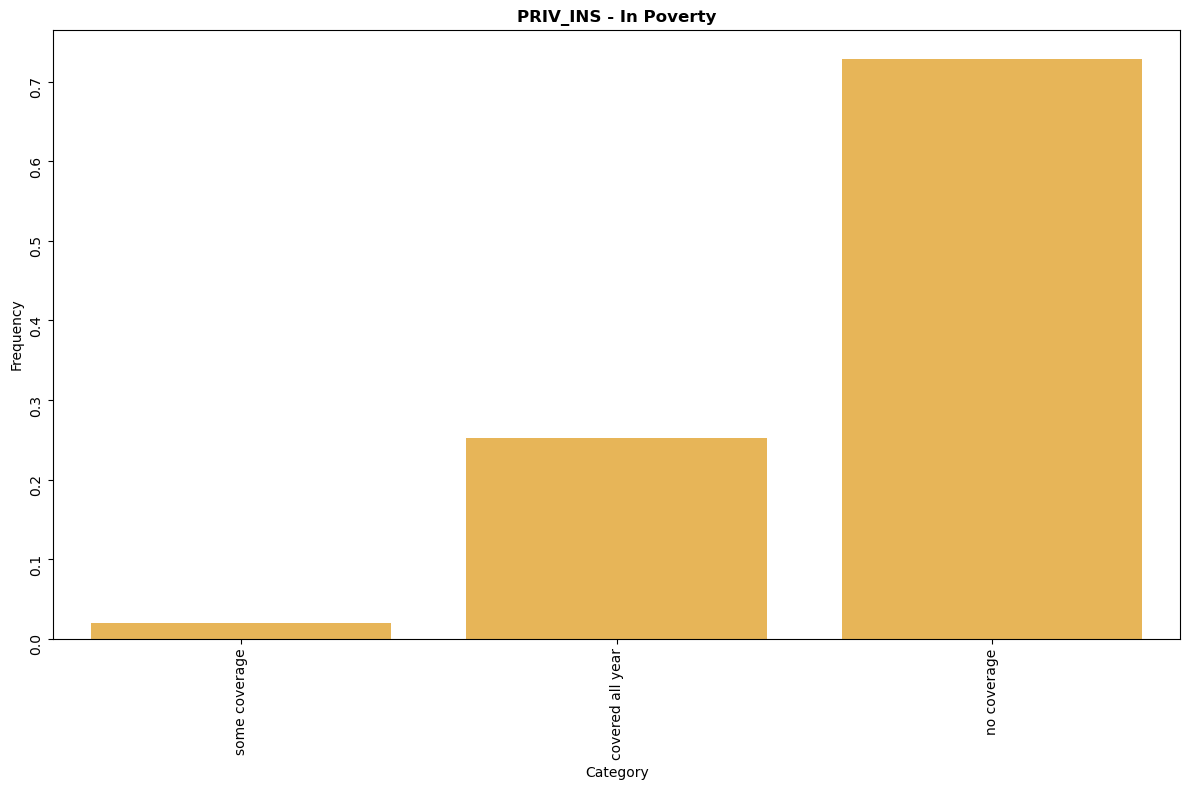

In [118]:
for col in plot_list:
    f_plot2(col)

Considering individuals in Cluster 4 that are classified in poverty:
* represents roughly 4,851 people (approximately 44% of people in poverty in dataset)

### Cluster 1 Analysis

In [119]:
df1 = df.loc[df['cluster'] == 1]

In [121]:
def f_plot3(variable, color = 'blue'):
    df_1 = df1.loc[df1['POV_STS'] == 'in poverty']
    fig, ax =  plt.subplots(1, 1, figsize=(12,8))
    
    sns.barplot(x=df_1[variable].value_counts().index, y = df_1[variable].value_counts\
                  (normalize = True),color = 'orange', alpha = 0.75,
              order=df_1[variable].value_counts(ascending=True).index)
    ax.tick_params(rotation=90)
    ax.set_title(f"{variable} - In Poverty", fontweight = 'bold')
    ax.set_xlabel("Category")
    ax.set_ylabel("Frequency")
    plt.tight_layout()
    plt.subplots_adjust(wspace=.4)

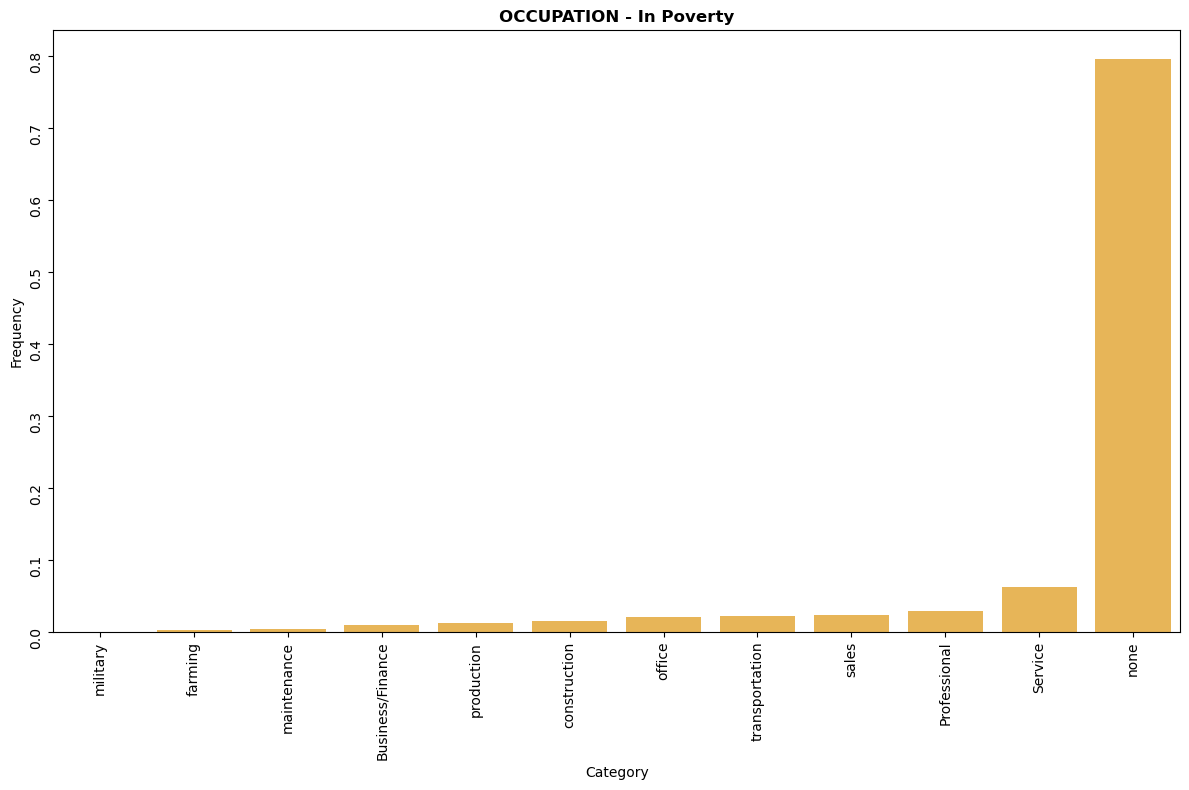

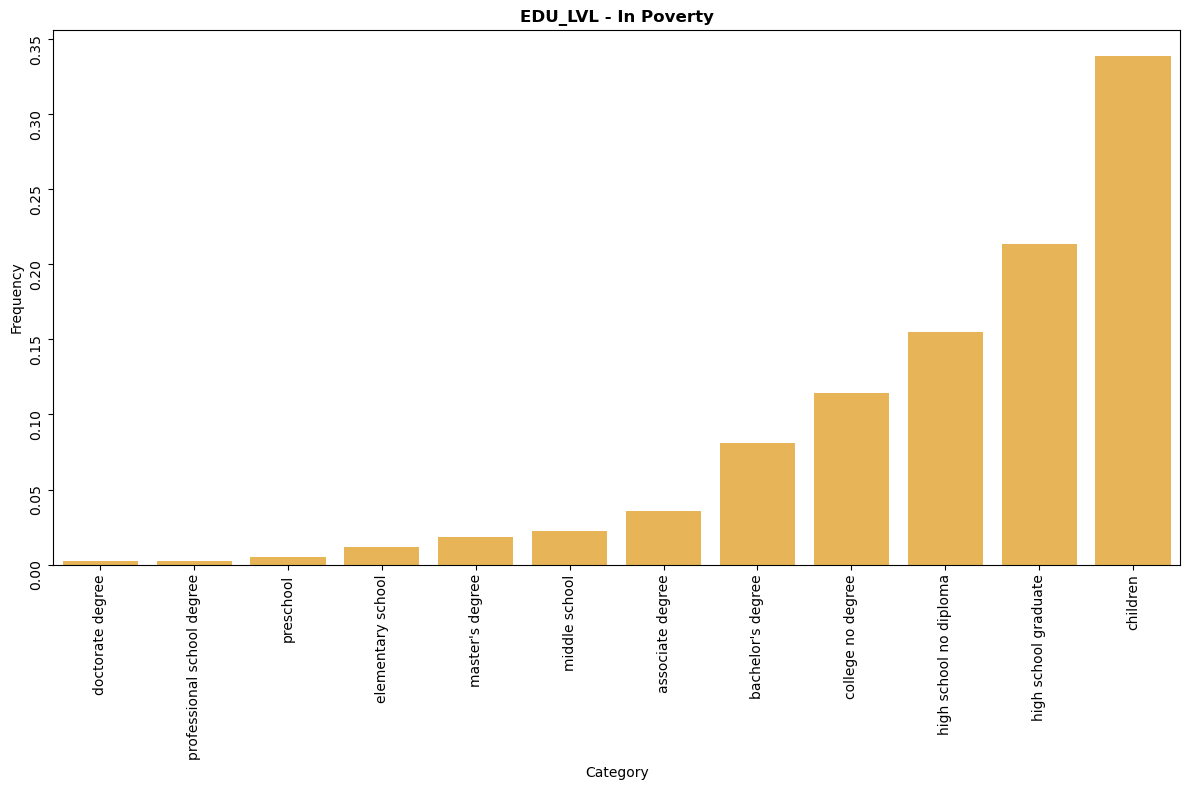

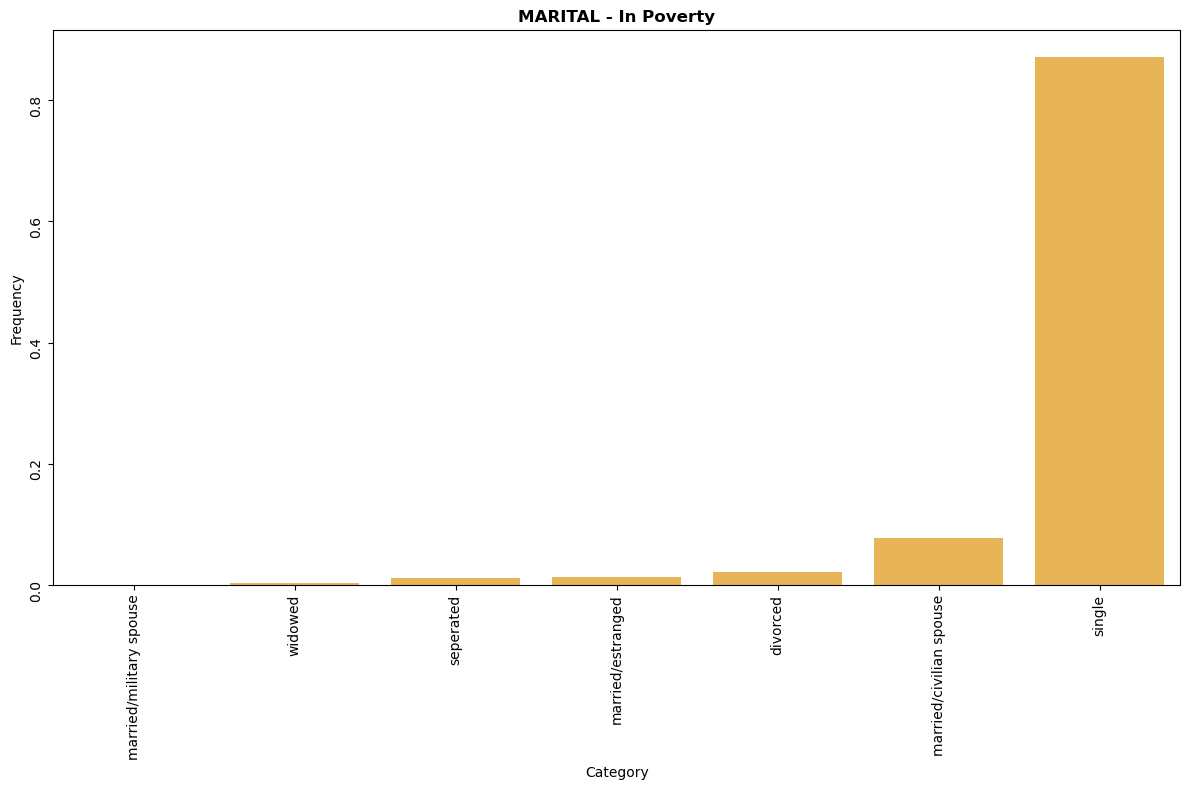

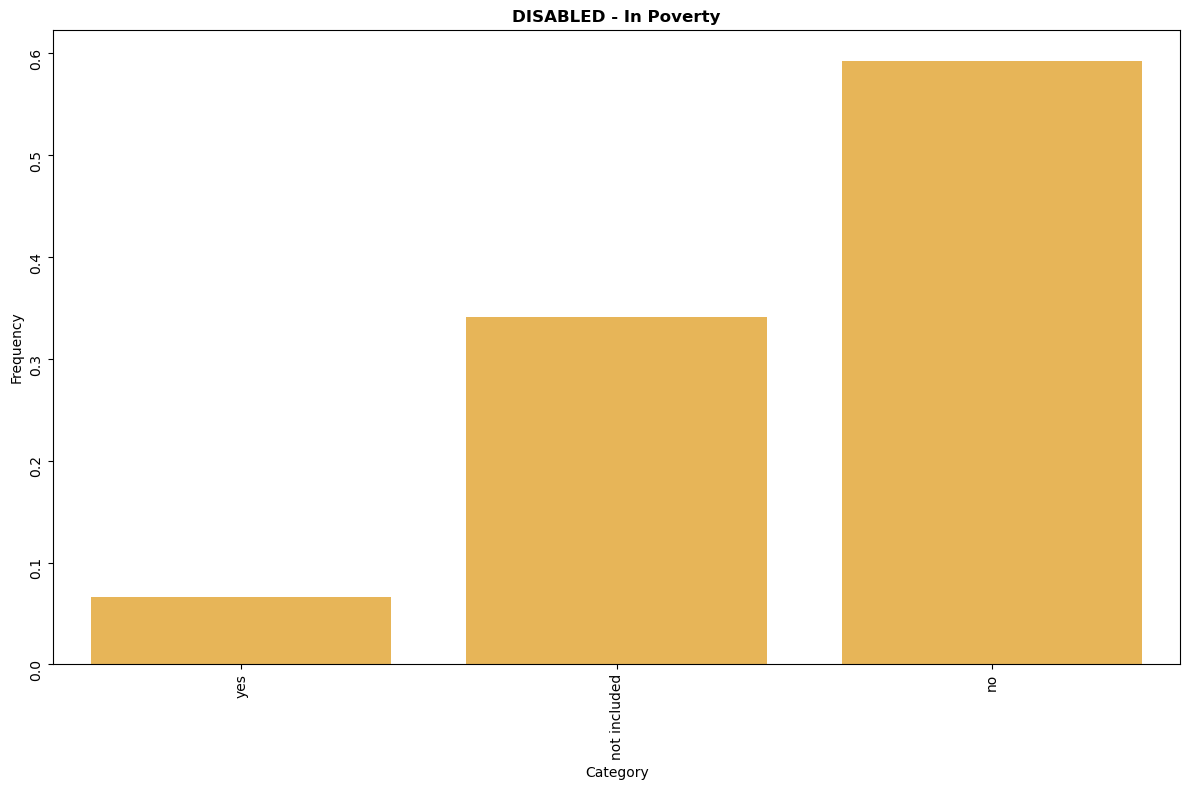

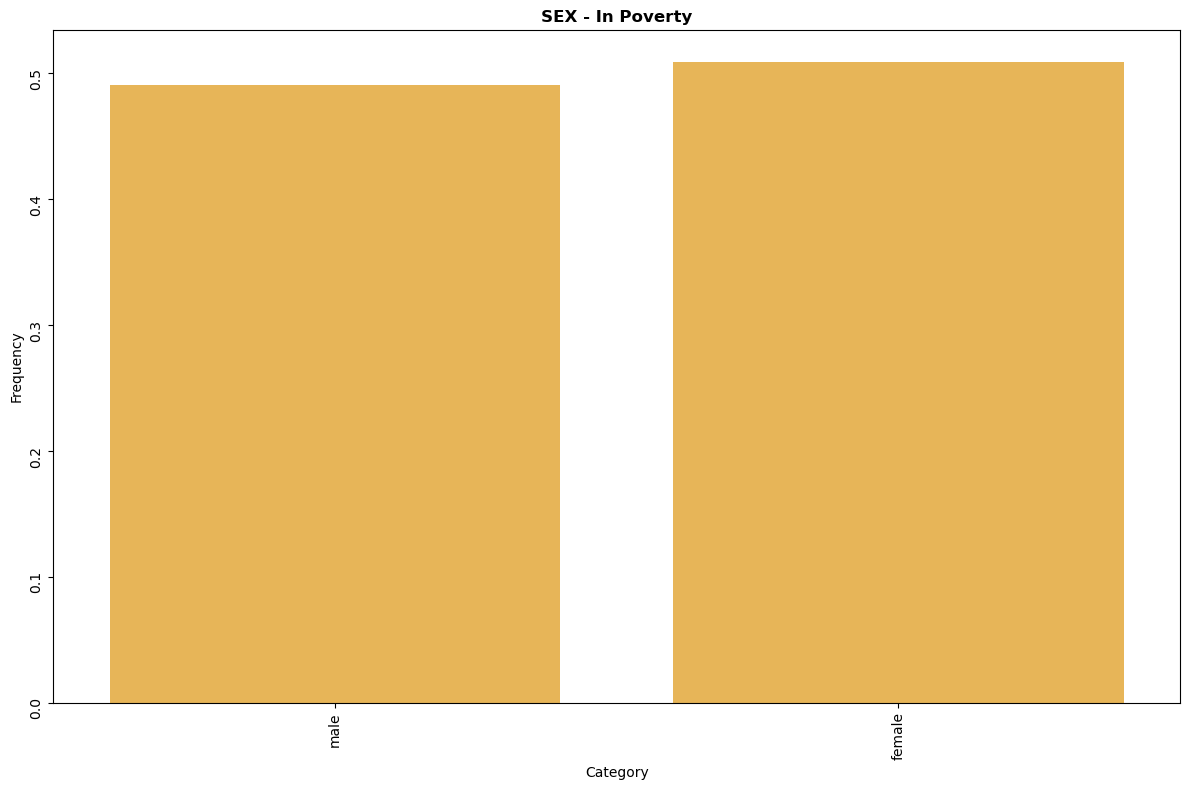

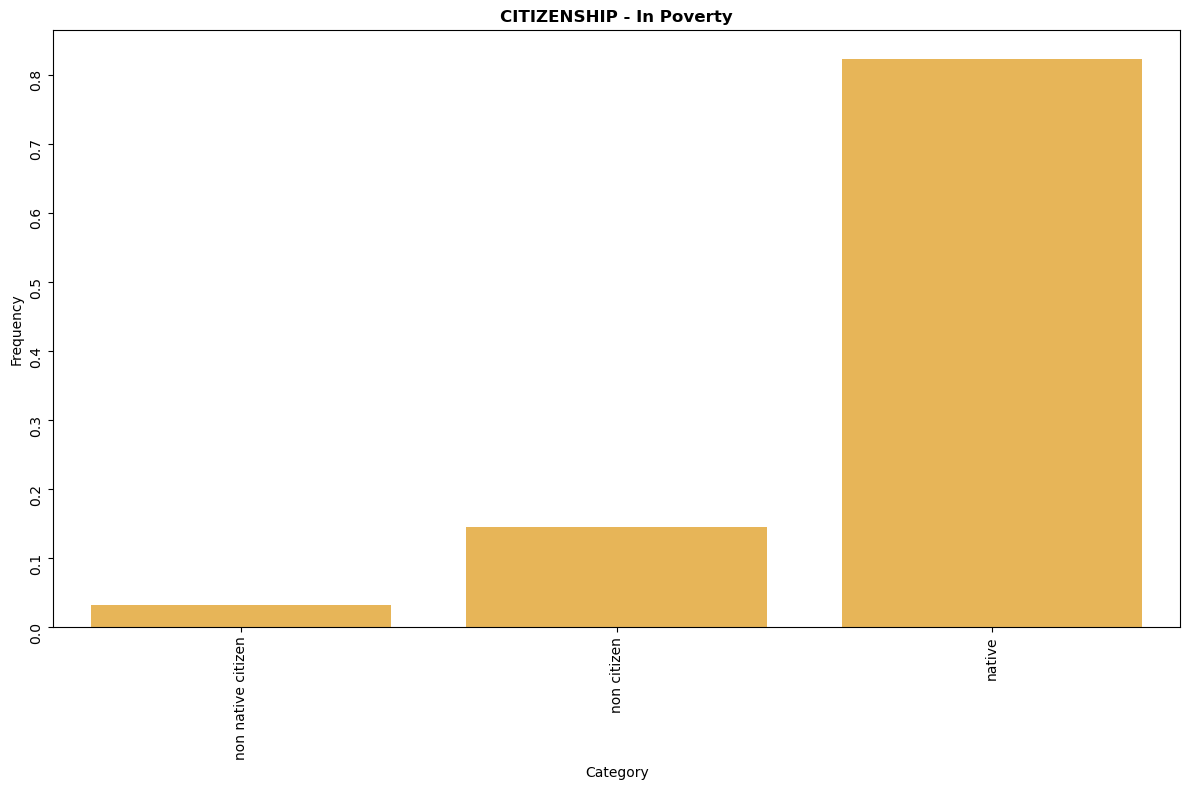

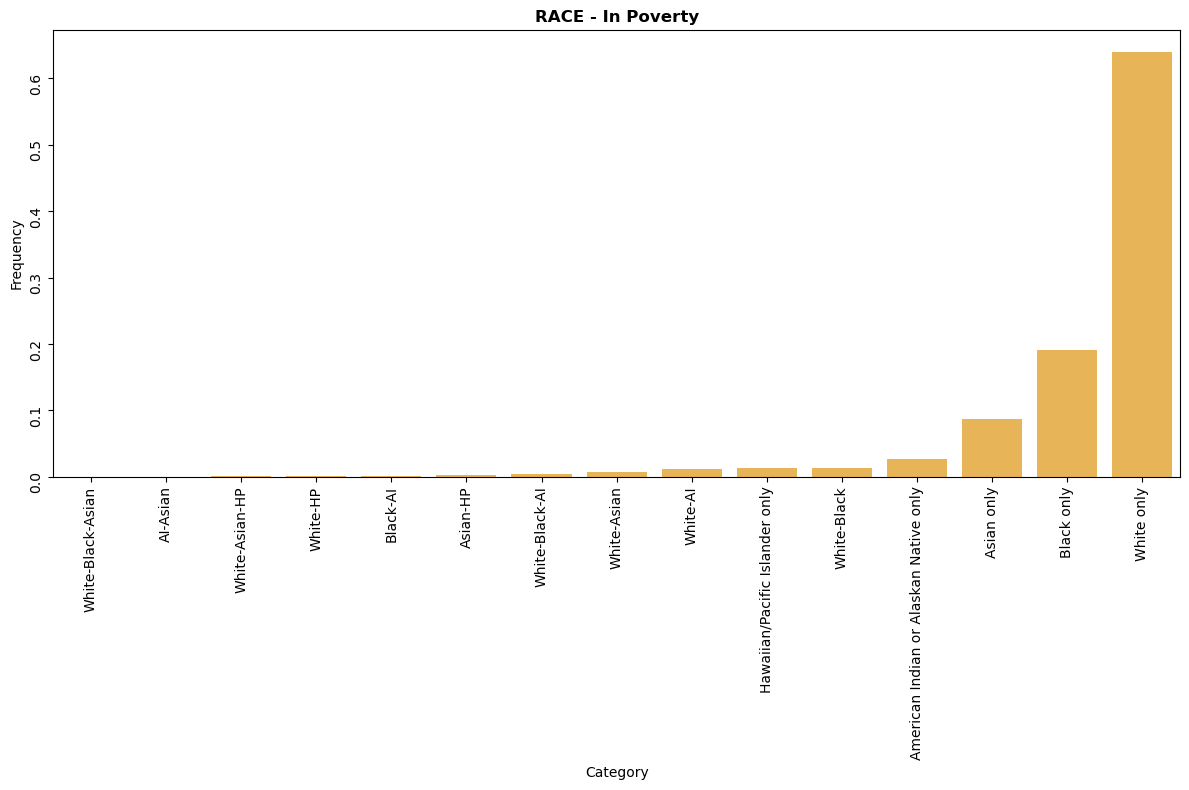

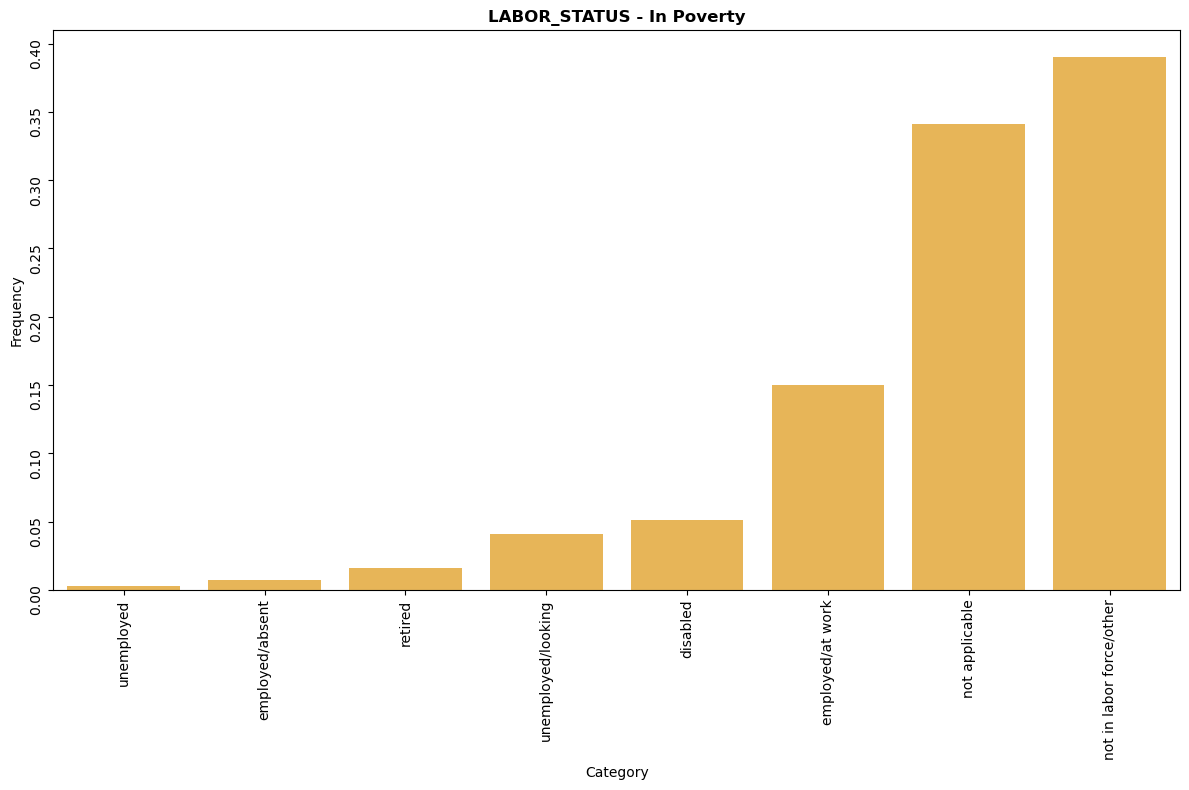

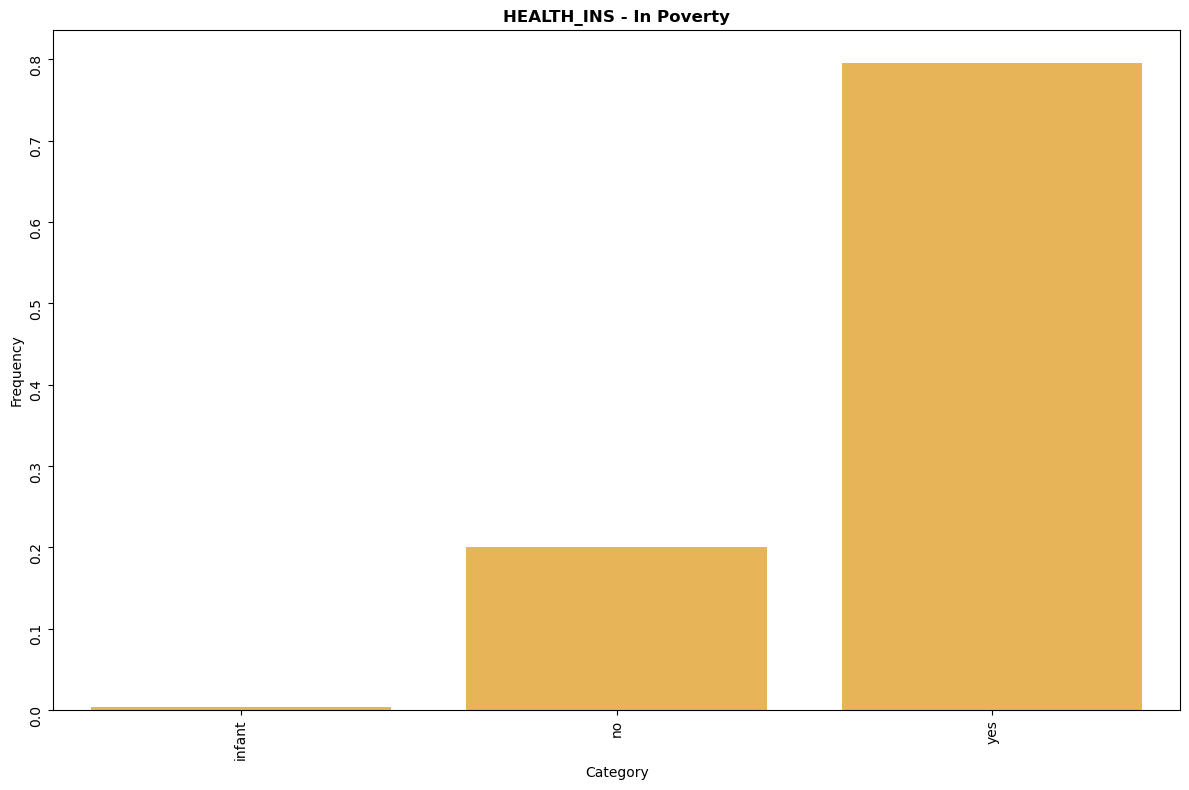

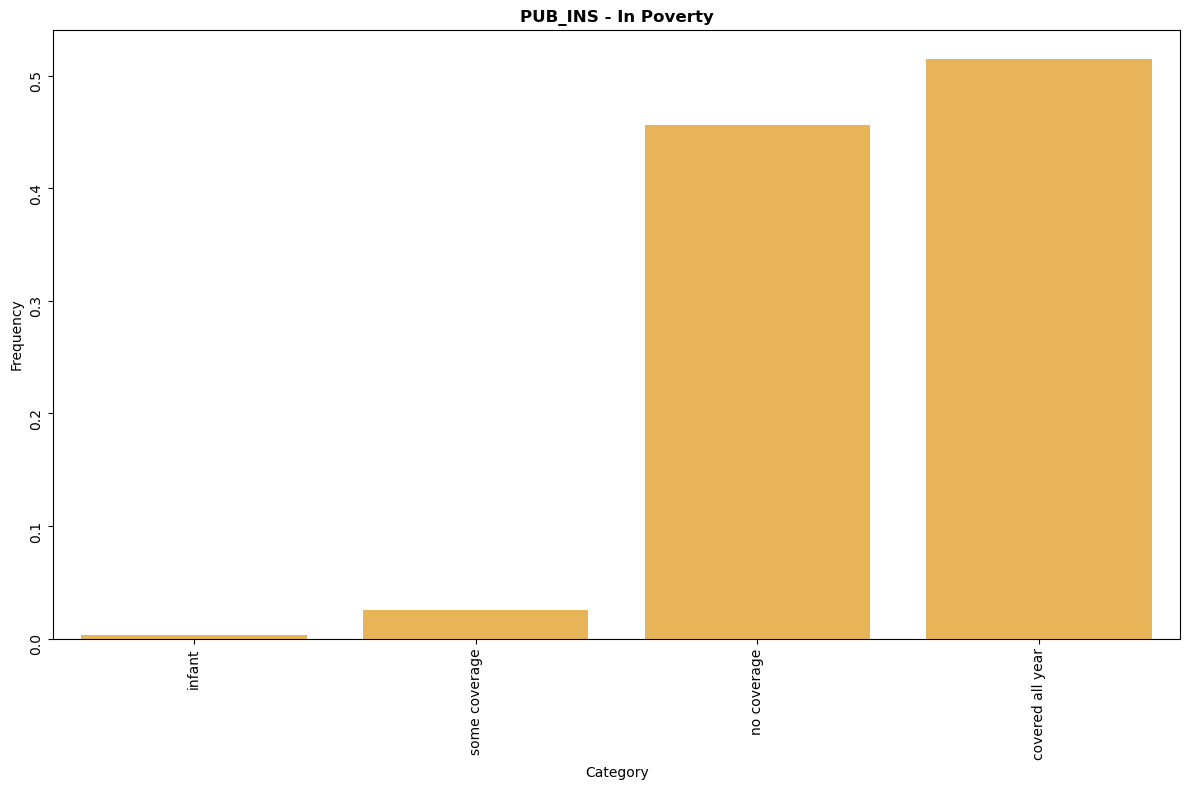

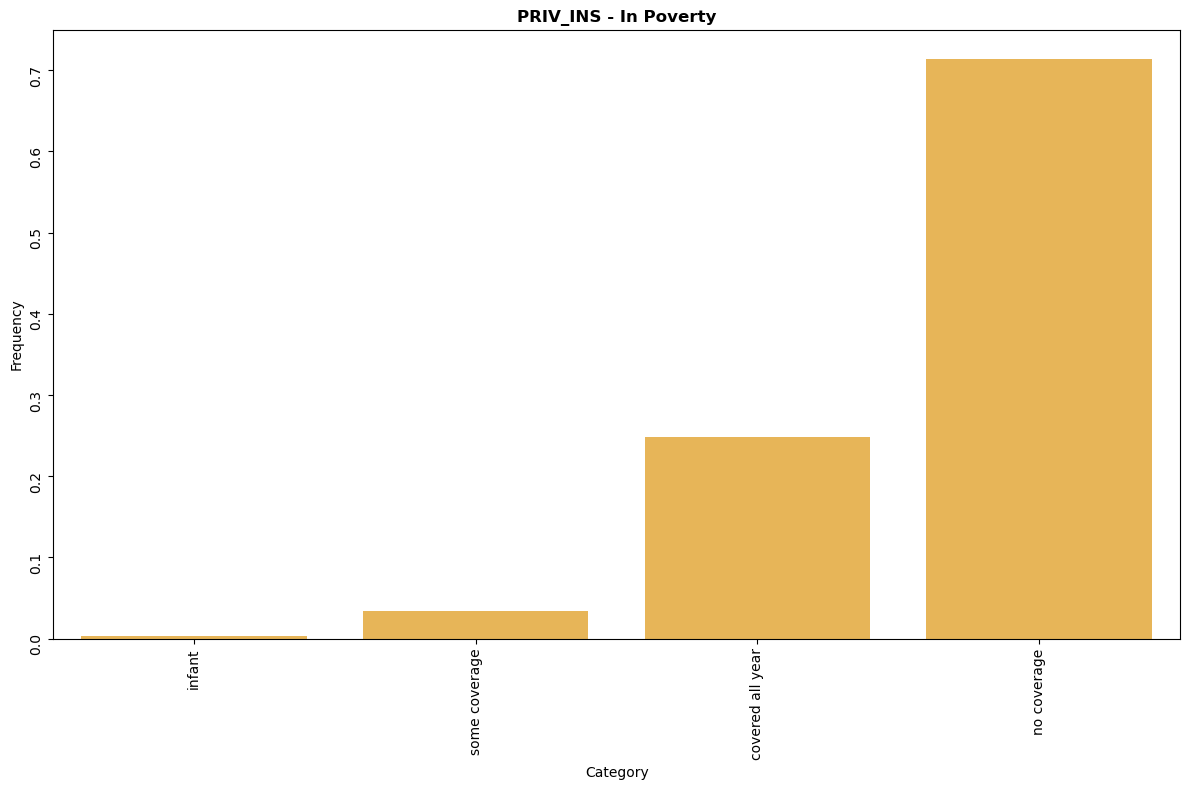

In [123]:
for col in plot_list:
    f_plot3(col)

Considering individuals in Cluster 1 that are classified in poverty:
* represents roughly 4,065 people (approximately 37% of people in poverty in dataset)

### Cluster Comparison

* 

### DBScan

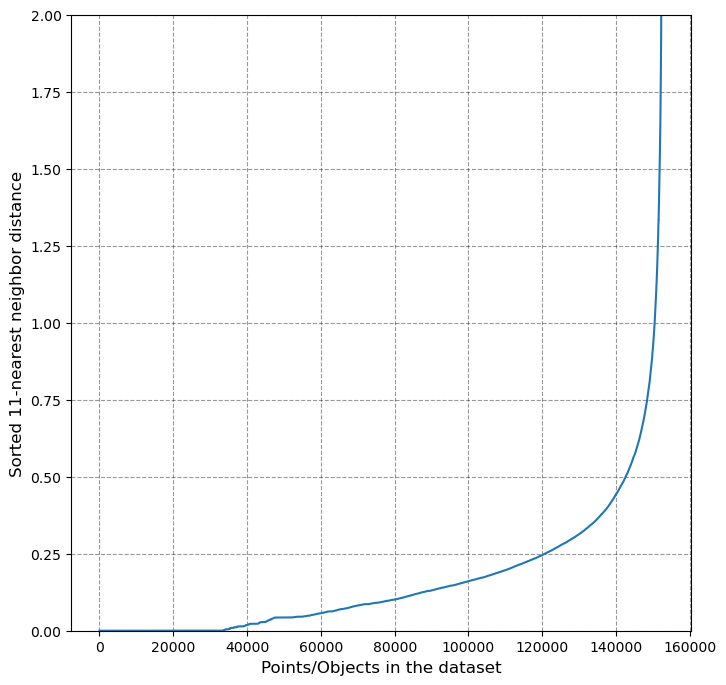

In [83]:
#tips for hyperparemeter tuning of DBScan
#https://stackoverflow.com/questions/15050389/estimating-choosing-optimal-hyperparameters-for-dbscan

#find optimal epsilon
def get_kdist_plot(X, k, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.ylim(bottom = 0, top = 2)
    plt.show()


k = 2 * X_num.shape[-1] - 1 
get_kdist_plot(X_num, k)

Optimal epsilon may be between .25 and 1 (greatest curvature)

In [9]:
#search for optimal epsilon and min_samples with silhouette score

eps_list = [.7,.75,.8,.85]
sample_list = [12,14,16,18]

silhouette_list_db = []

for value in eps_list:
    db_dict_silhouette = {}
    for other_value in sample_list:
        db = DBSCAN(eps=value, min_samples=other_value)
        db.fit(X_num)
        db_dict_silhouette[(value,other_value)] = silhouette_score(X_num,db.labels_)
    silhouette_list_db.append(db_dict_silhouette)

In [10]:
silhouette_list_db

[{(0.7, 12): 0.46908763939106923,
  (0.7, 14): 0.5986424454449123,
  (0.7, 16): 0.616944028195341,
  (0.7, 18): 0.5984587158350348},
 {(0.75, 12): 0.6095716109913254,
  (0.75, 14): 0.6002135250220781,
  (0.75, 16): 0.599347099105914,
  (0.75, 18): 0.6103527683405859},
 {(0.8, 12): 0.6674015289893667,
  (0.8, 14): 0.6650177467071503,
  (0.8, 16): 0.6172418882944455,
  (0.8, 18): 0.6173201160708989},
 {(0.85, 12): 0.6735607434976729,
  (0.85, 14): 0.6780408424894757,
  (0.85, 16): 0.6106829179667977,
  (0.85, 18): 0.6175276834554287}]

Epsilon of .85 and 14 minimum samples seems to be optimal.

In [11]:
db = DBSCAN(eps=.85, min_samples=14)
db.fit(X_num)

DBSCAN(eps=0.85, min_samples=14)

In [12]:
X_db = X[X_num.columns].copy()
X_db['cluster'] = db.labels_

### DBScan Analysis

In [13]:
X_db['cluster'].value_counts(normalize=True)

 0    0.983795
-1    0.015111
 4    0.000386
 1    0.000288
 2    0.000249
 3    0.000170
Name: cluster, dtype: float64

* 5 clusters excluding the noise
* Over 98% of data in one cluster
* Only about .1% of data in other 4 clusters

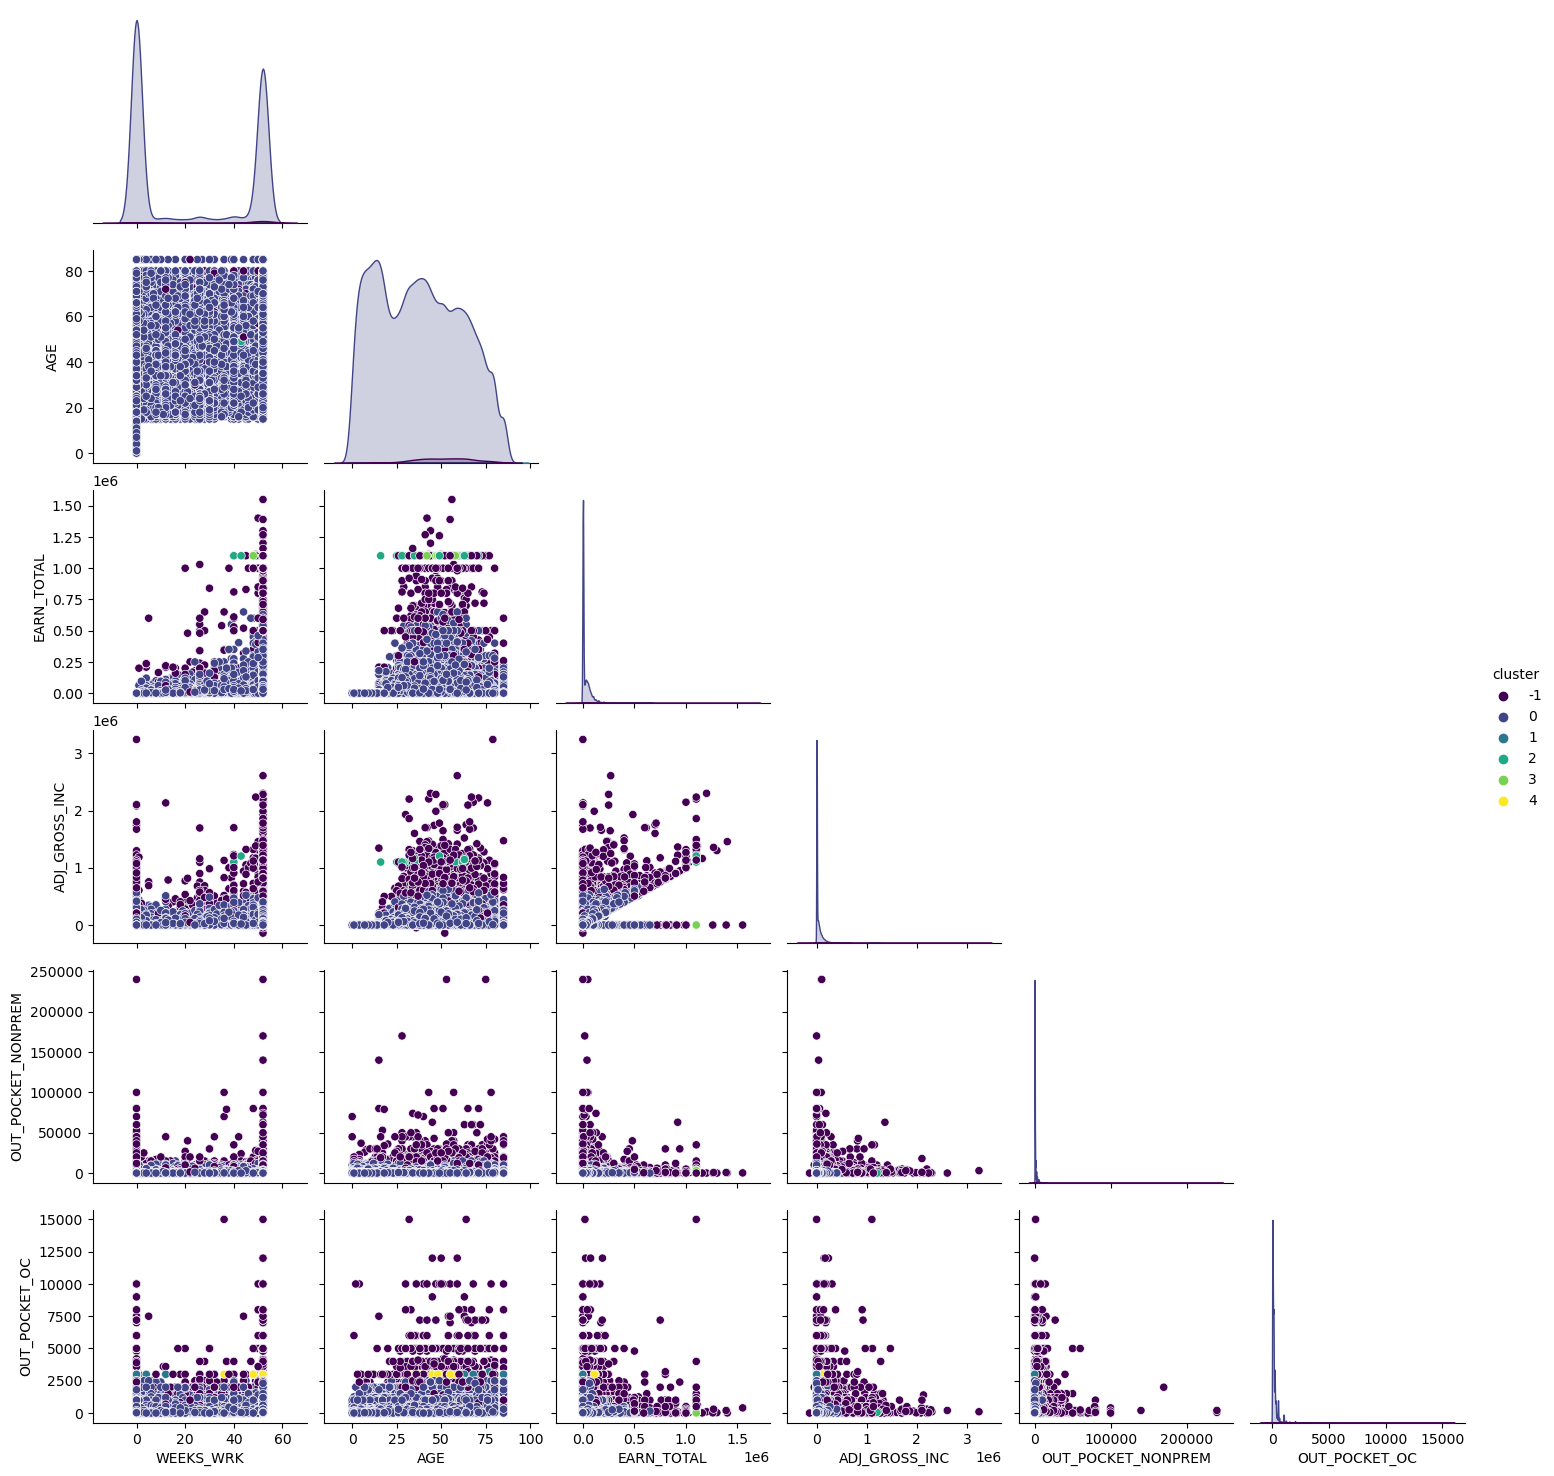

In [14]:
sns.pairplot(data = X_db, hue = 'cluster', corner = True, palette = 'viridis');

In [15]:
X_db.groupby("cluster").agg(['mean', 'median'])

WEEKS_WRK               AGE           EARN_TOTAL             \
              mean median       mean median          mean     median   
cluster                                                                
-1       35.991334   52.0  51.735702   52.0  1.775222e+05    70000.0   
 0       23.043233    0.0  38.053209   37.0  2.644454e+04        0.0   
 1        0.386364    0.0  69.159091   67.0  5.475000e+02        0.0   
 2       51.131579   52.0  46.921053   49.0  1.099999e+06  1099999.0   
 3       51.769231   52.0  45.615385   46.5  1.099999e+06  1099999.0   
 4       51.661017   52.0  52.406780   53.0  5.947407e+04    56002.0   

        ADJ_GROSS_INC            OUT_POCKET_NONPREM         OUT_POCKET_OC  \
                 mean     median               mean  median          mean   
cluster                                                                     
-1       3.329425e+05   183041.5        7592.490035  4000.0   1278.026430   
 0       3.261285e+04        0.0         576.908550   100.0    143.054274   
 1       7.701614e+03        0.5        1030.545455   500.0   3002.272727   
 2       1.118002e+06  1100904.5         392.394737    98.0     81.052632   
 3       0.000000e+00        0.0         674.038462   280.0    118.461538   
 4       6.712471e+04    71705.0        1146.033898   900.0   2996.610169   

                 
         median  
cluster          
-1        500.0  
 0         50.0  
 1       3000.0  
 2         62.5  
 3         87.5  
 4       3000.0

In [16]:
X_db.groupby("cluster").agg(['min', 'max'])

WEEKS_WRK     AGE     EARN_TOTAL          ADJ_GROSS_INC           \
              min max min max        min      max           min      max   
cluster                                                                    
-1              0  52   0  85          0  1550000       -141217  3240777   
 0              0  52   0  85          0   670000        -19935   671050   
 1              0  12  45  85          0    21000             0    82998   
 2             40  52  16  71    1099999  1099999       1099999  1219710   
 3             48  52  32  58    1099999  1099999             0        0   
 4             36  52  27  70          0   120000             0   179406   

        OUT_POCKET_NONPREM         OUT_POCKET_OC         
                       min     max           min    max  
cluster                                                  
-1                       0  240000             0  15000  
 0                       0   16000             0   2500  
 1                       0    4000          2800   3200  
 2                       0    2000             0    400  
 3                       0    3000             0    500  
 4                       0    3500          2800   3100

* According to the median, outlier cluster is characterized by 3rd highest age, 3rd highest earn total, 2nd highest adjusted gross income, and highest for out of pocket non premium mdical care. 
* Cluster 0 (98% of data) interestingly has a median earn total and adjusted gross income of $0. Age ranges from 0 to 85 and medical expenses are quite low.  
* Cluster 1 is quite ssimilar to Cluster 0 except the average age and out of pocket over the counter expenses are much higher. 

In [17]:
df['db_cluster'] = db.labels_

In [127]:
df.groupby('db_cluster')['POV_STS'].value_counts(normalize=True)

db_cluster  POV_STS       
-1          not in poverty    0.932409
            in poverty        0.067591
 0          not in poverty    0.926932
            in poverty        0.073068
 1          not in poverty    0.704545
            in poverty        0.295455
 2          not in poverty    1.000000
 3          not in poverty    1.000000
 4          not in poverty    1.000000
Name: POV_STS, dtype: float64

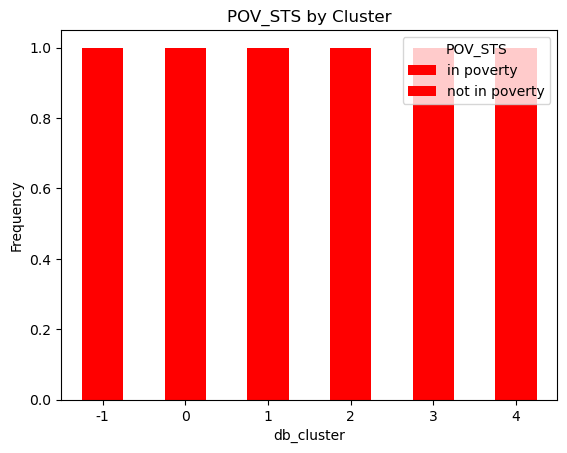

In [166]:
cluster_group = df.groupby('db_cluster')['POV_STS'].value_counts(normalize=True)
cluster_group.unstack().plot.bar(stacked=True, color = 'red')
plt.ylabel("Frequency")
plt.xticks(rotation=360)
plt.title("POV_STS by Cluster");

### Cluster 0 Analysis

In [124]:
df1db = df.loc[df['db_cluster'] == 1]

In [125]:
def f_plot4(variable, color = 'blue'):
    df_1 = df1db.loc[df1db['POV_STS'] == 'in poverty']
    fig, ax =  plt.subplots(1, 1, figsize=(12,8))
    
    sns.barplot(x=df_1[variable].value_counts().index, y = df_1[variable].value_counts\
                  (normalize = True),color = 'orange', alpha = 0.75,
              order=df_1[variable].value_counts(ascending=True).index)
    ax.tick_params(rotation=90)
    ax.set_title(f"{variable} - In Poverty", fontweight = 'bold')
    ax.set_xlabel("Category")
    ax.set_ylabel("Frequency")
    plt.tight_layout()
    plt.subplots_adjust(wspace=.4)

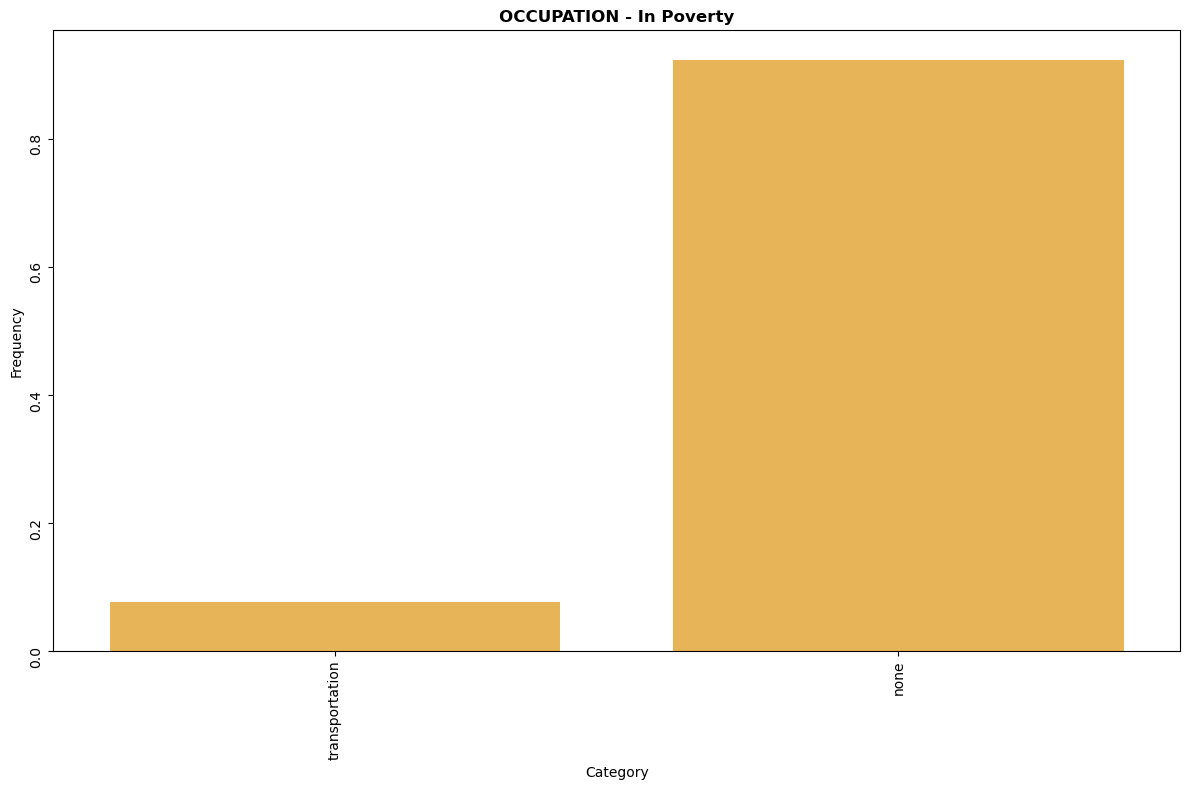

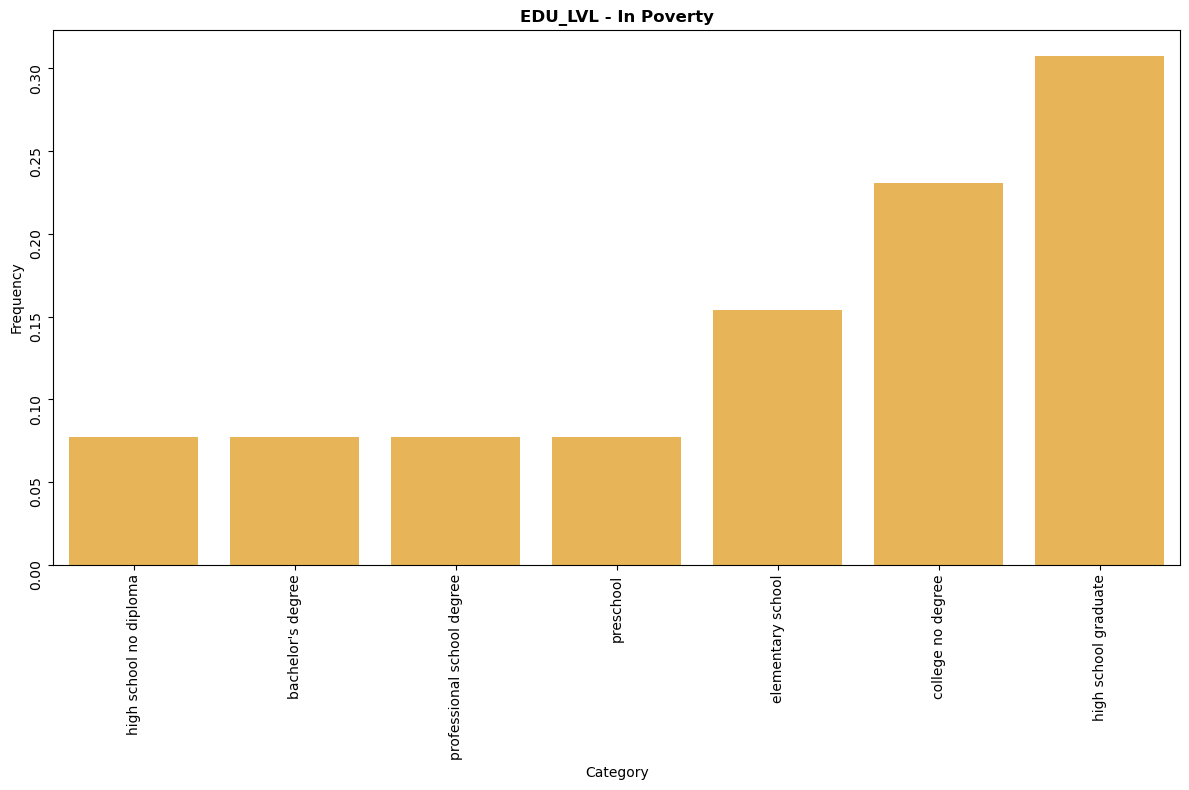

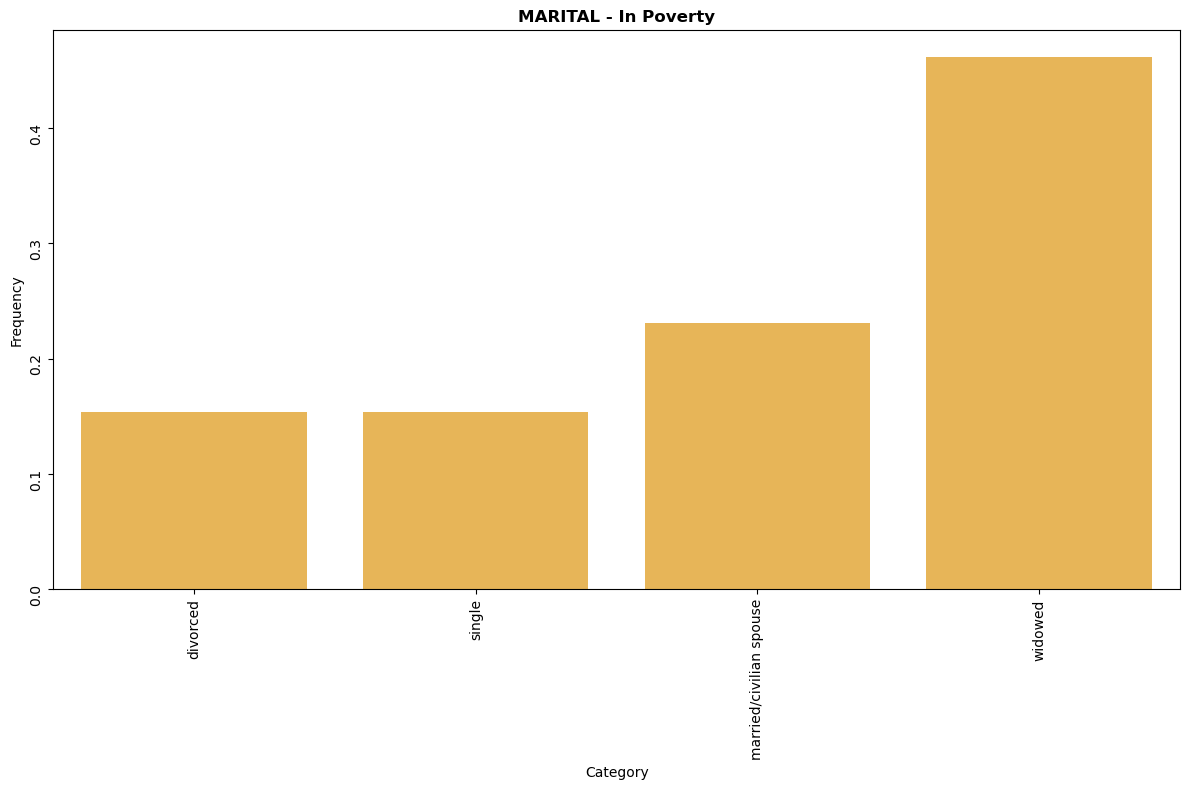

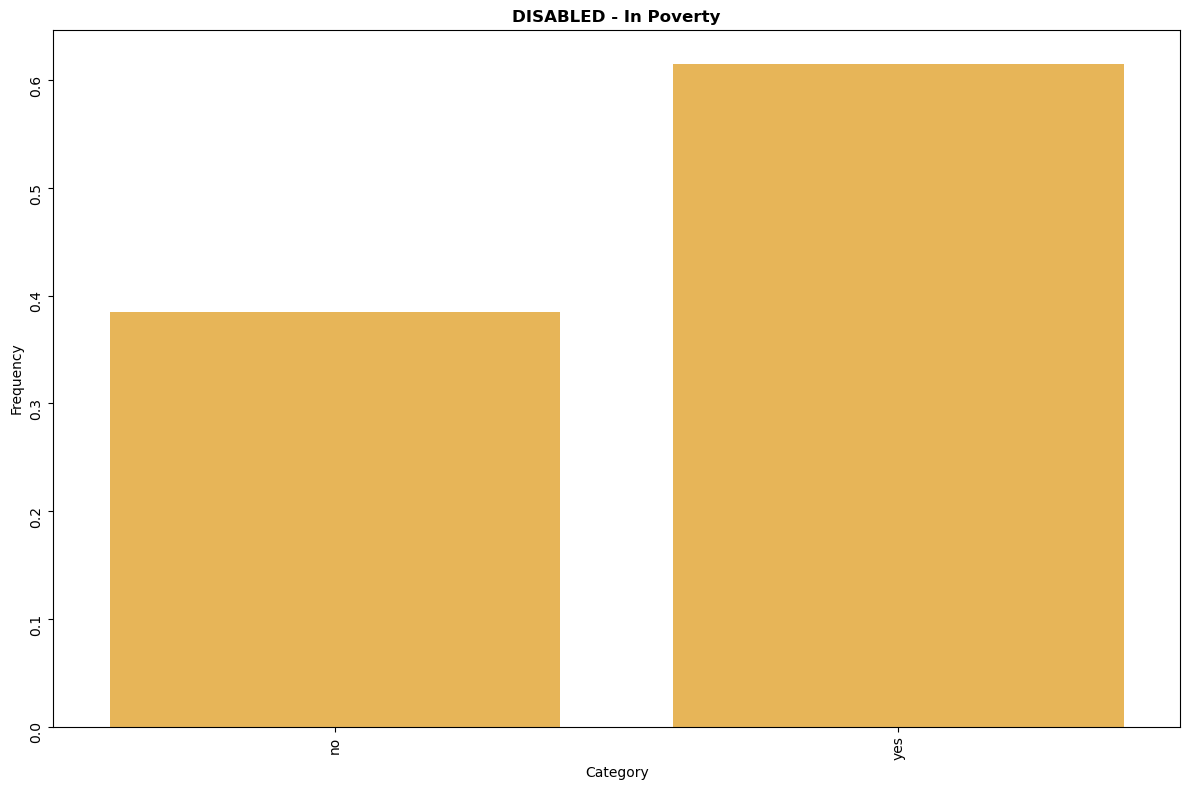

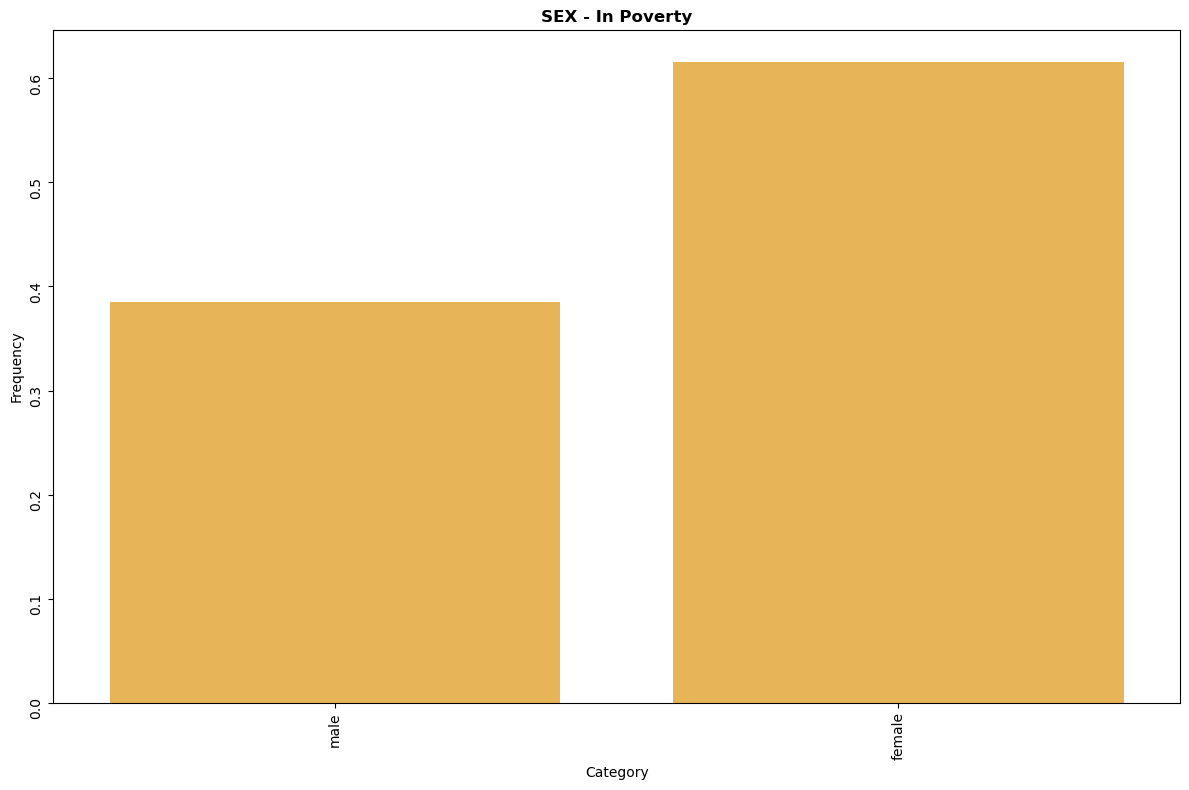

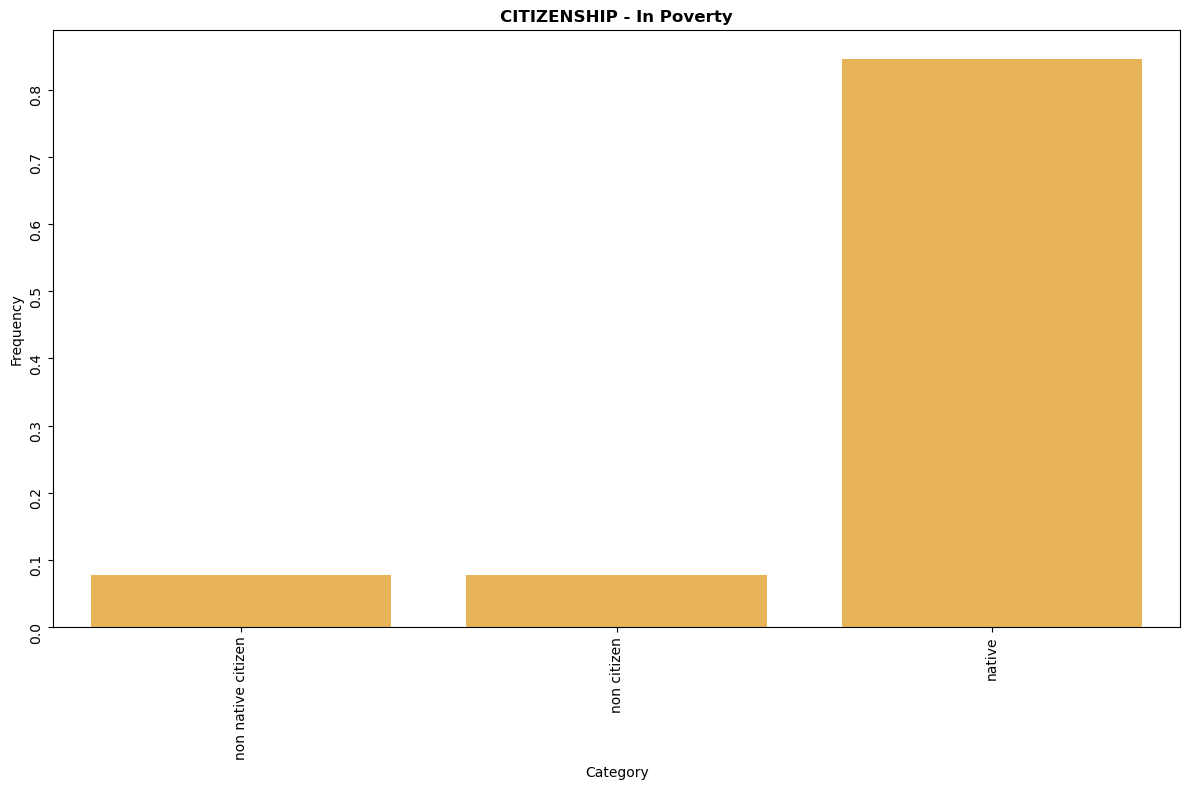

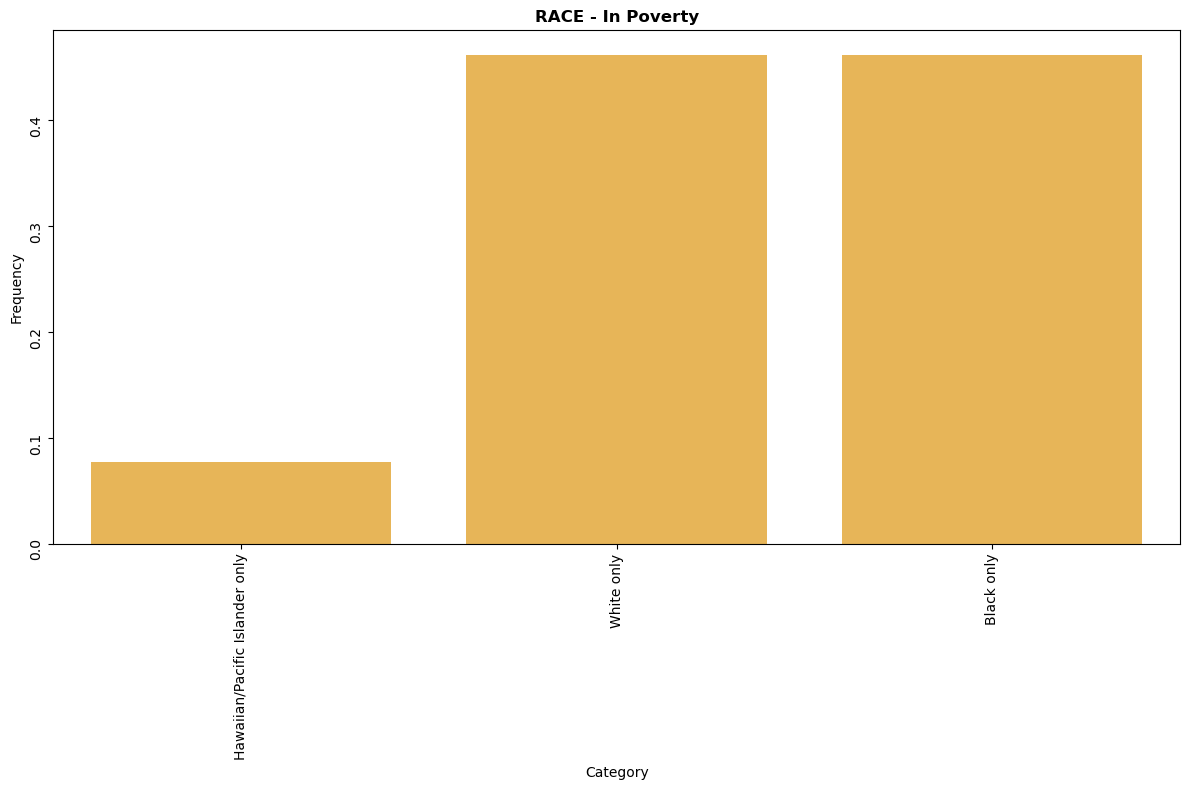

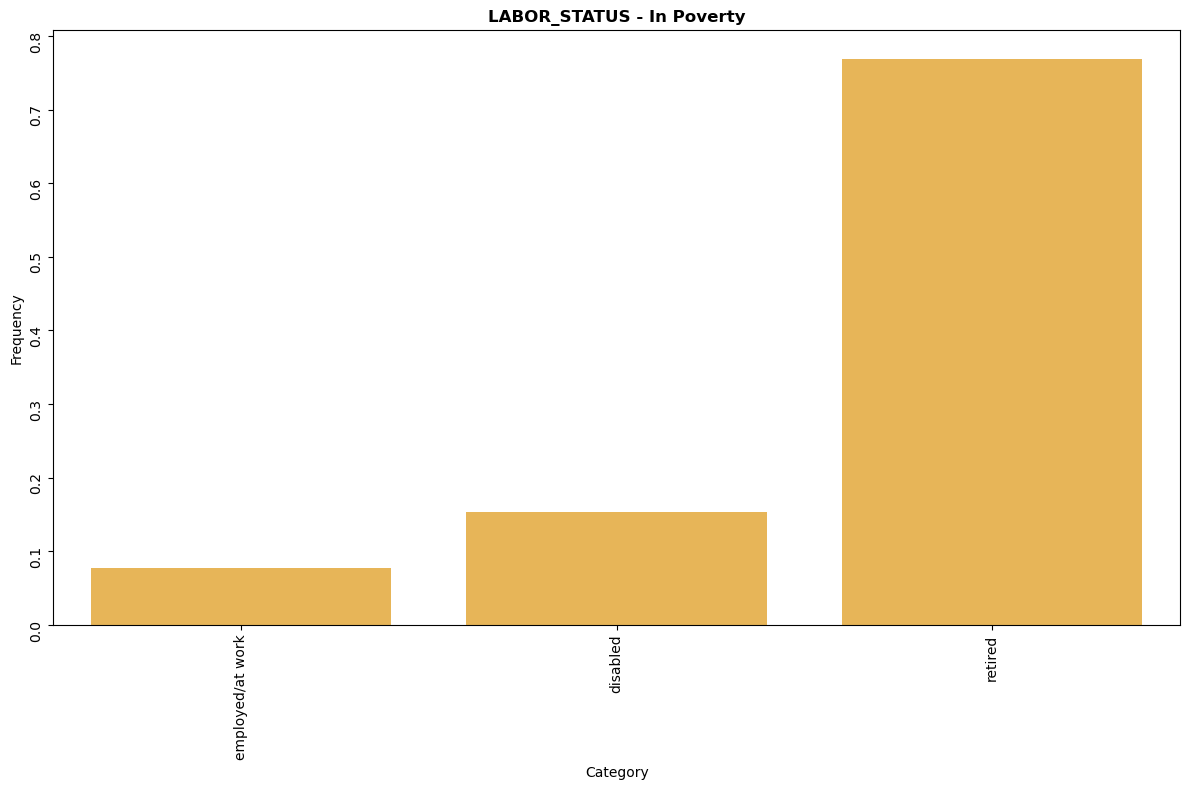

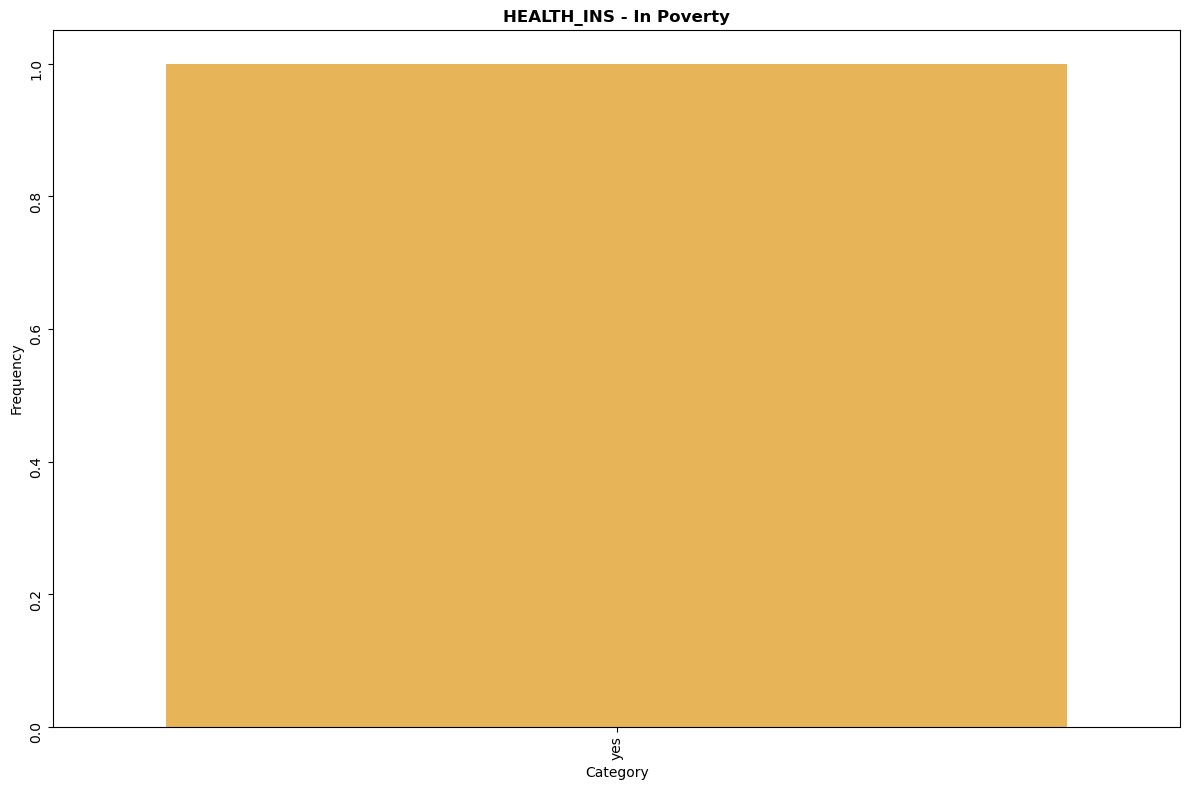

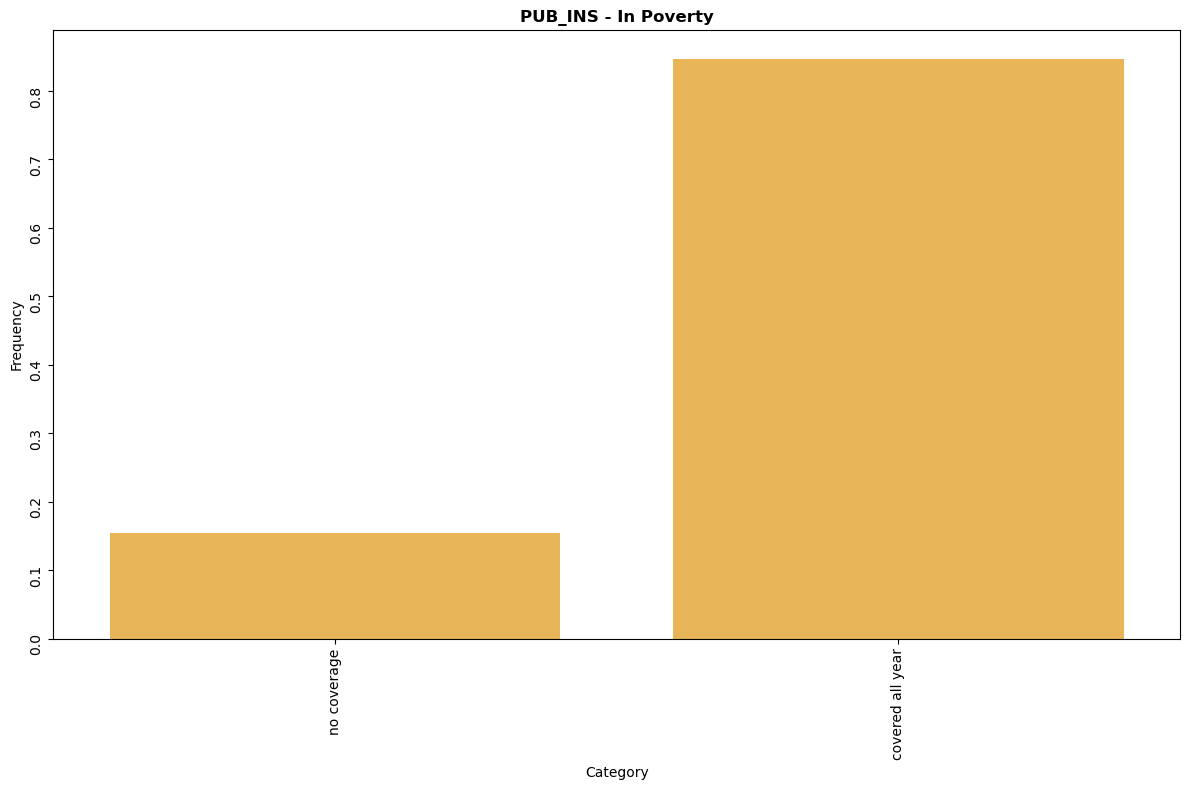

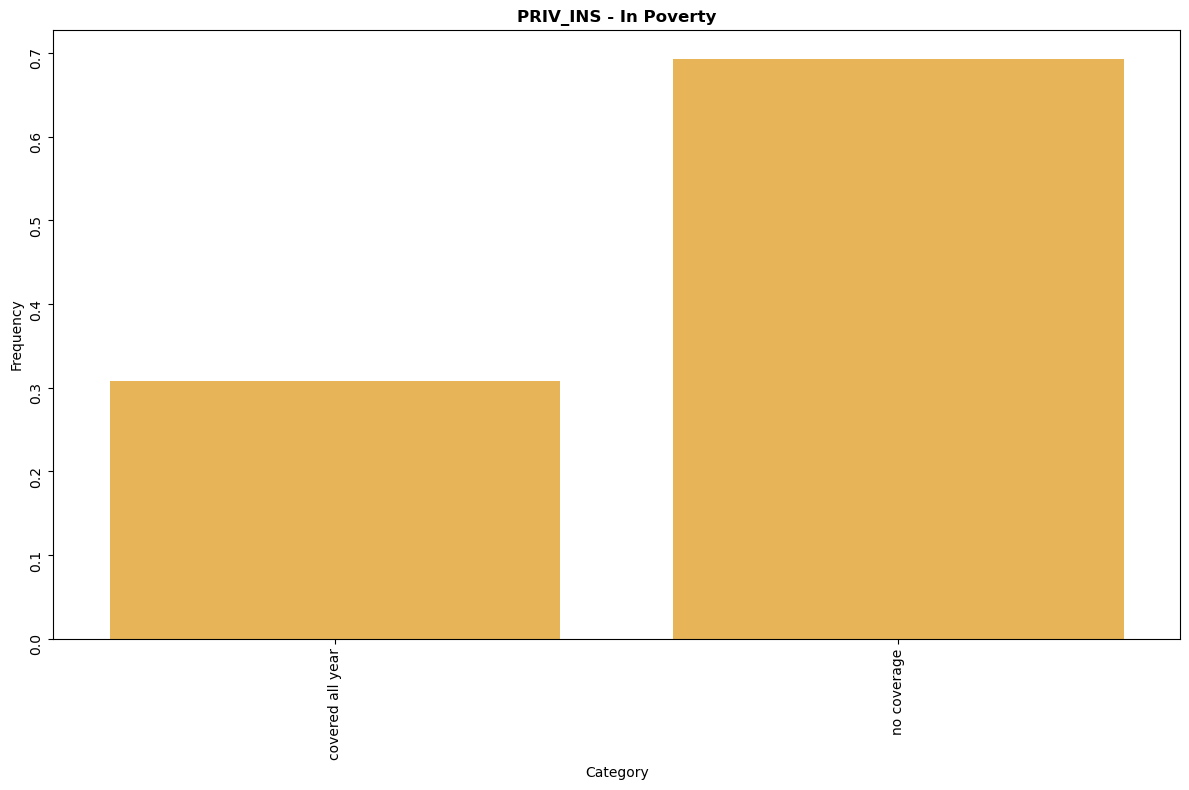

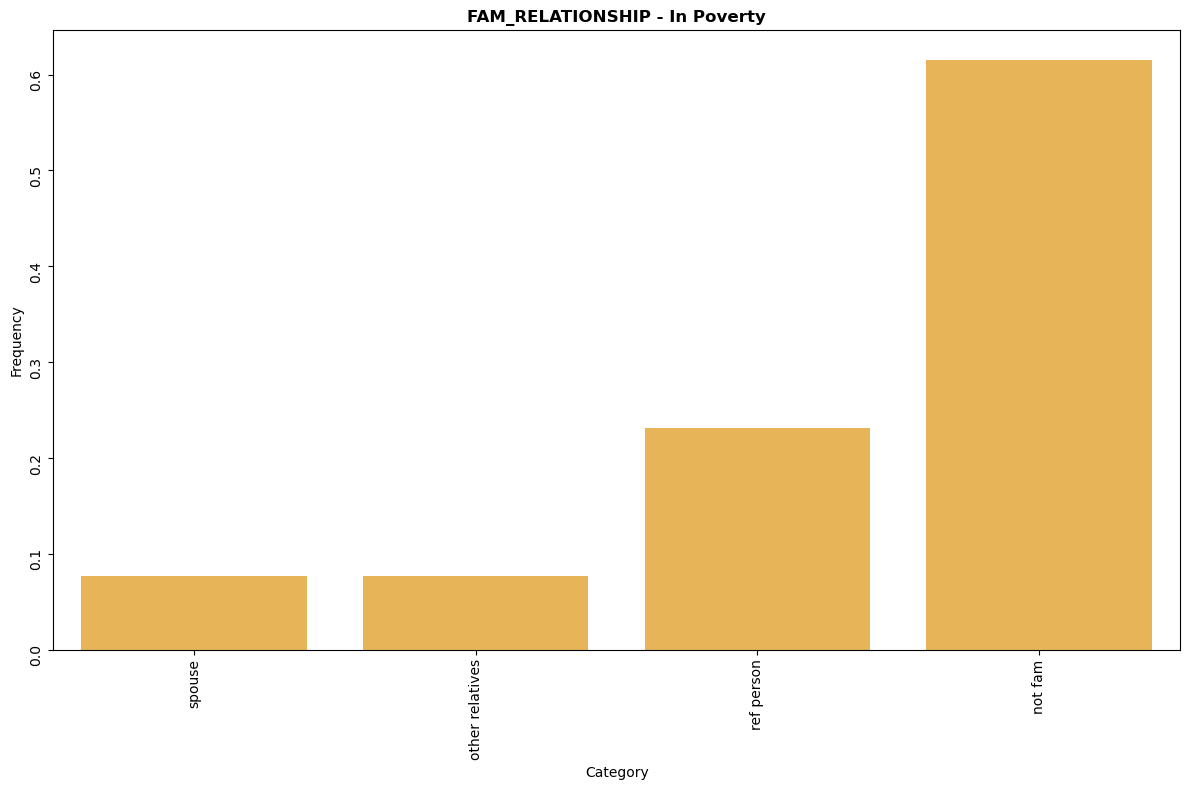

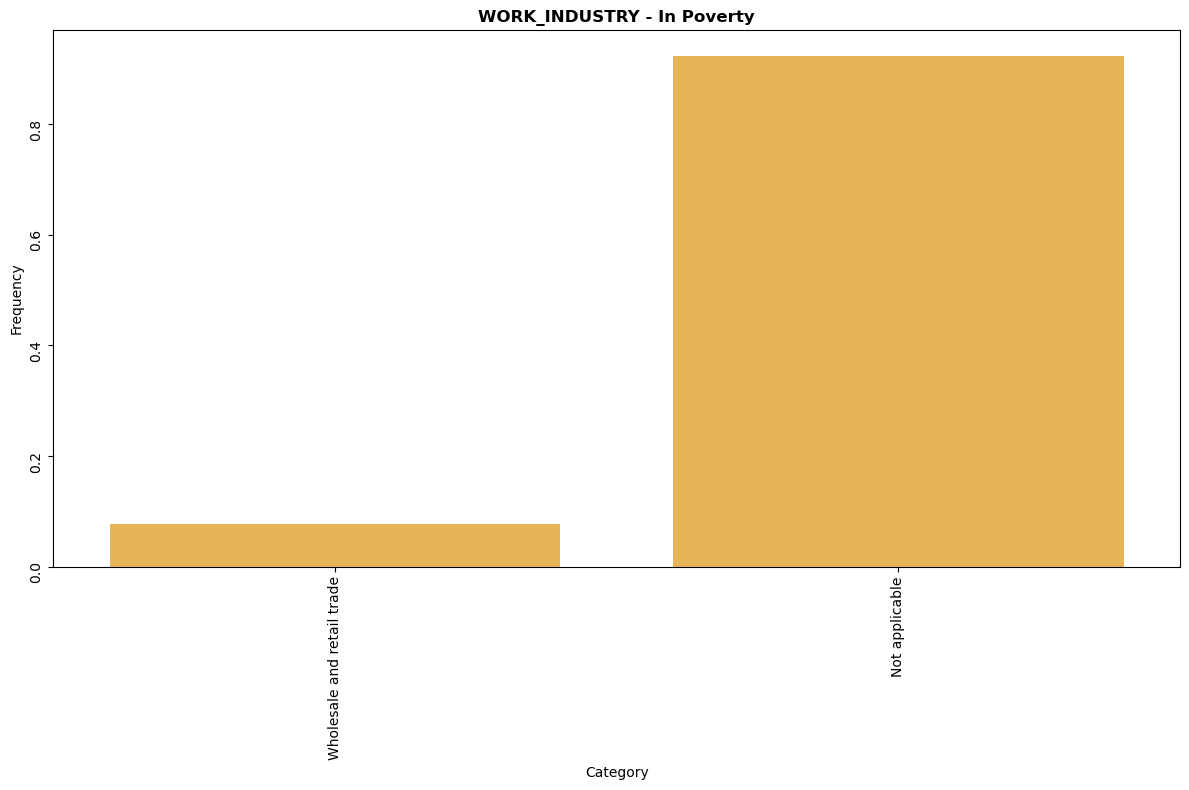

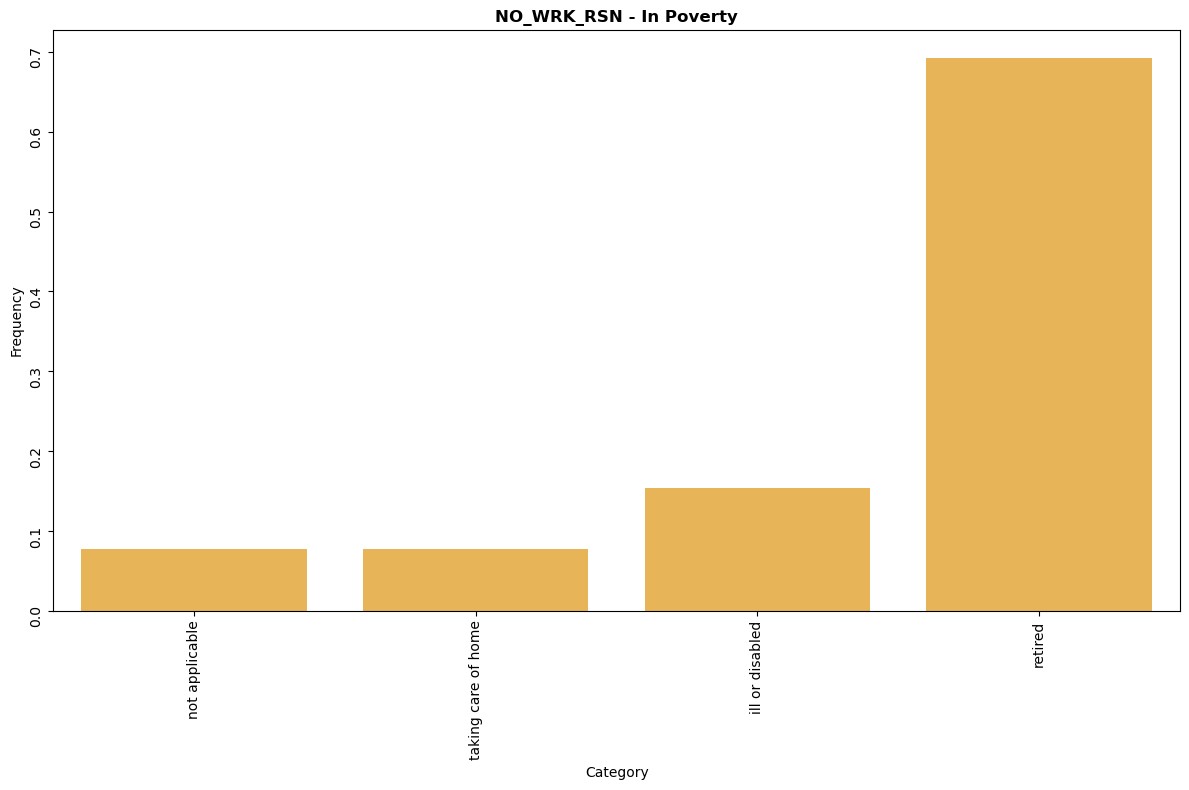

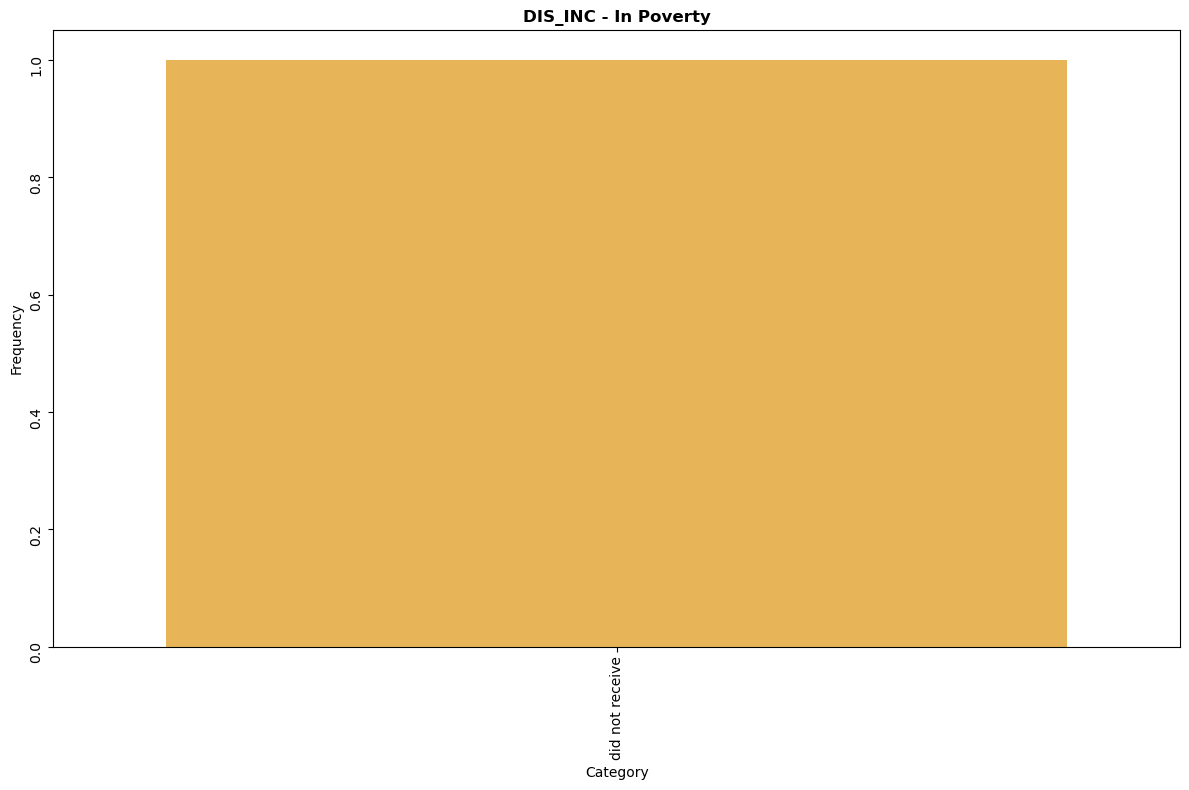

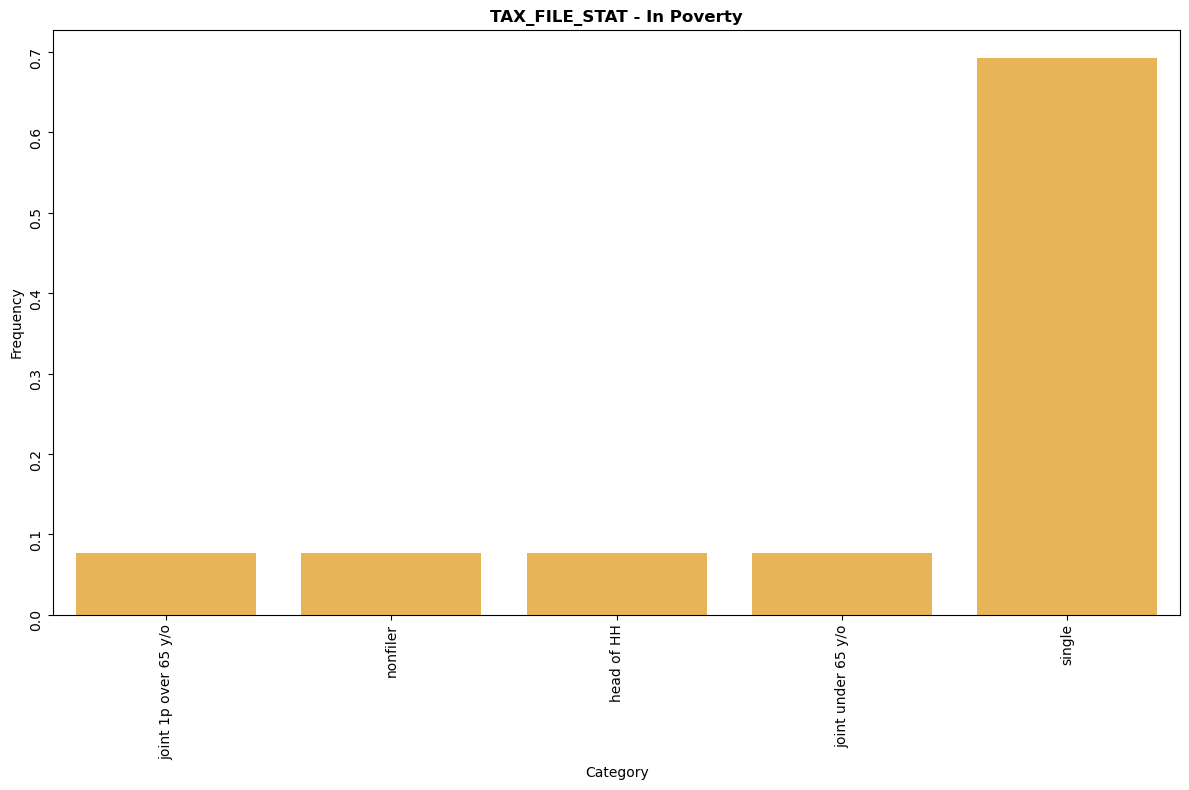

In [132]:
for col in plot_list:
    f_plot4(col)

Considering individuals in Cluster 0 that are classified in poverty:
* represents roughly 10,979 people (approximately 99% of people in poverty in dataset)

## Categorical Clustering
---

### KModes

In [ ]:
#pip install --upgrade kmodes
#in terminal
#Source - https://pypi.org/project/kmodes/
'''
k-modes is used for clustering categorical variables.
It defines clusters based on the number of matching categories between data points.
(This is in contrast to the more well-known k-means algorithm, which clusters numerical data based on Euclidean distance.)
The k-prototypes algorithm combines k-modes and k-means and is able to cluster mixed numerical / categorical data.

@Misc{devos2015,
  author = {Nelis J. de Vos},
  title = {kmodes categorical clustering library},
  howpublished = {\url{https://github.com/nicodv/kmodes}},
  year = {2015--2021}
}
'''

In [135]:
X_category = df[['FAM_RELATIONSHIP', 'OCCUPATION', 'EDU_LVL', 'MARITAL', 'SEX', 'MILITARY', 'HISPANIC',
                 'IMMIGR_YR', 'CITIZENSHIP', 'DISABLED','RACE', 'WORK_INDUSTRY', 'LABOR_STATUS', 'WRK_STATUS',
                 'NO_WRK_RSN','FT_PT', 'EARN_SOURCE', 'ERN_OTR', 'WORK_DIS', 'TAX_FILE_STAT','HEALTH_INS',
                 'PUB_INS', 'PRIV_INS']]

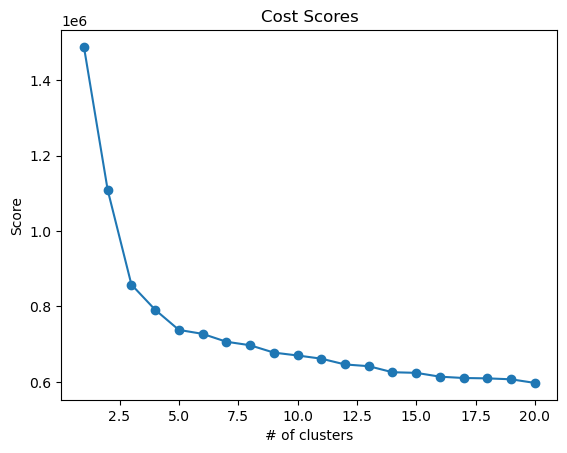

In [136]:
cost_list = []

for k in range(1,21):
    kmodes = KModes(n_clusters=k, random_state = 42)
    kmodes.fit(X_category)
    cost_list.append(kmodes.cost_)

plt.plot(range(1,21), cost_list, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.title("Cost Scores");

## Mixed Clustering
---

### K-Prototype

In [171]:
X_transformed.head()

,WEEKS_WRK,AGE,EARN_TOTAL,ADJ_GROSS_INC,OUT_POCKET_NONPREM,OUT_POCKET_OC,FAM_RELATIONSHIP,OCCUPATION,EDU_LVL,MARITAL,SEX,MILITARY,HISPANIC,IMMIGR_YR,CITIZENSHIP,DISABLED,RACE,WORK_INDUSTRY,LABOR_STATUS,WRK_STATUS,NO_WRK_RSN,FT_PT,EARN_SOURCE,ERN_OTR,WORK_DIS,TAX_FILE_STAT,HEALTH_INS,PUB_INS,PRIV_INS,POV_STS
0,1.155748,0.160274,0.237757,0.076472,-0.309536,-0.453118,not fam,Professional,associate degree,single,male,no,no,not immigrant,native,no,White only,Information,employed/at work,FT hours,not applicable,ft all year,wage,no,no,single,yes,no coverage,covered all year,not in poverty
1,0.592845,1.021489,-0.462026,0.482889,-0.164564,-0.318953,ref person,Business/Finance,high school graduate,married/civilian spouse,male,no,no,not immigrant,native,no,White only,Construction,employed/at work,"PT hrs, usually PT for non-economic",not applicable,pt part year,self employment,yes,no,joint under 65 y/o,yes,no coverage,covered all year,not in poverty
2,1.155748,1.107611,0.297919,-0.420961,-0.309536,-0.173608,spouse,Professional,bachelor's degree,married/civilian spouse,female,no,no,not immigrant,native,yes,White only,Public administration,employed/absent,"Not at work, usually FT",not applicable,ft all year,wage,no,no,joint under 65 y/o,yes,no coverage,covered all year,not in poverty
3,1.155748,-0.528699,0.171262,0.253993,-0.309536,-0.173608,ref person,sales,college no degree,married/civilian spouse,male,no,no,not immigrant,native,no,White only,"Other services, except public administration",employed/at work,FT hours,not applicable,ft all year,wage,no,no,joint under 65 y/o,yes,no coverage,covered all year,not in poverty
4,0.834089,-0.614821,-0.145382,-0.420961,-0.173625,-0.173608,spouse,Professional,college no degree,married/civilian spouse,female,no,no,not immigrant,native,no,American Indian or Alaskan Native only,"Educational services, and health care and soci...",employed/absent,"Not at work, usually FT",not applicable,ft part year,wage,no,yes,joint under 65 y/o,yes,no coverage,covered all year,not in poverty


In [190]:
#convert numerical columns back to float after transfromation
X_transformed = X_transformed.astype({'WEEKS_WRK':'float','AGE':'float',
                                     'EARN_TOTAL':'float','ADJ_GROSS_INC':'float',
                                     'OUT_POCKET_NONPREM':'float','OUT_POCKET_OC':'float'})

In [199]:
#find position of categorical variables for KPrototypes
cat_pos = [X_transformed.columns.get_loc(col) for col in list(X_transformed.select_dtypes('object').columns)]

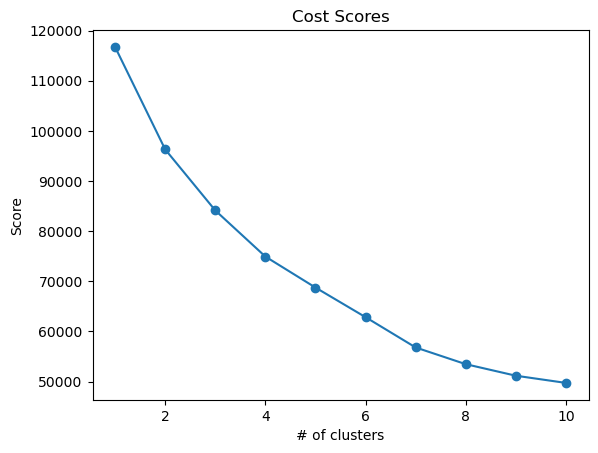

In [201]:
cost_list = []

for k in range(1,11):
    kproto = KPrototypes(n_clusters=k, random_state = 42,n_jobs=-1)
    kproto.fit(X_transformed,categorical = cat_pos)
    cost_list.append(kproto.cost_)

plt.plot(range(1,11), cost_list, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.title("Cost Scores");

Optimal clusters appears to be 7.

In [202]:
#Fit clustering algorithm with 5 clusters
kproto = KPrototypes(n_clusters=7, random_state = 42,n_jobs=-1)
kproto.fit(X_transformed,categorical = cat_pos)
X_kproto = X.copy()
X_kproto['cluster'] = kproto.labels_

KeyboardInterrupt: 

## Clustering Conclusions